Bu bölüm, "ADANA ŞİKAYET YÖNETİM SİSTEMİ:VERİ BİLİMİ YAKLAŞIMI PROJESİ" kapsamlı ve operasyonel bir düzeye taşımaktadır. Genişletilmiş SQL veri setleriyle, XGBoost ve Naive Bayes gibi makine öğrenimi modelleri entegre edilmiştir.Sistem, otomasyon ve Flask tabanlı bir web arayüzü ile daha akıllı, otomatik ve erişilebilir bir şikayet yönetim çözümü sunmayı hedeflemektedir.Ek olarak Ayrıca, TensorFlow/Keras ile şikayet metinlerinden kategori tahmini gibi ileri düzey doğal dil işleme (NLP) yetenekleri kazandırılmıştır.

Dosya Yükleme İşleme

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Sikayet_1.csv to Sikayet_1.csv


Yükleme Yaptıktan Sonra Örnek Okuma İşlemi

In [ ]:
import pandas as pd

# Dosya adını seninkine göre değiştir
df = pd.read_csv("Sikayet_1.csv", sep=';')

# İlk 15 satırı tablo halinde göster (print kullanmayın)
df.head(15)

,ID,Tarih,İlçe,Kategori,Detay,Kanal,Cozum_Durumu,Cozum_Suresi_gün,Sikayet_basvuru_sayisi,Gun_Adi,...,Ilce_Sikayet_Sirasi,Gun_Sayisi_Ay,Week,Month,Season,Yogun_ilçe,Sikayet_Uzunlugu,Onceki_Sikayet_Varmi,Gecikme_Etkisi,Tatilde_Geldi_Mi
0,1,2025-06-01,Çukurova,Yol Sorunu,Yol üzerinde büyük çukur oluşmuş.,e-Devlet,Çözüldü,4,1,Pazar,...,1,30,22,Haziran,Yaz,150,30,0,0,0
1,2,2025-06-02,Seyhan,Çöp Toplama,Çöpler düzenli toplanmıyor.,Çağrı Merkezi,Beklemede,0,1,Pazartesi,...,2,30,23,Haziran,Yaz,200,28,1,1,0
2,3,2025-06-03,Yüreğir,Gürültü,Gece geç saatlerde yüksek sesli müzik.,Mobil Uygulama,Çözüldü,3,1,Salı,...,3,30,23,Haziran,Yaz,100,40,0,0,0
3,4,2025-06-04,Feke,Elektrik Kesintisi,2 gündür elektrik yok.,e-Devlet,Çözüldü,2,1,Çarşamba,...,1,30,23,Haziran,Yaz,50,23,1,1,0
4,5,2025-06-05,Tufanbeyli,Park ve Bahçeler,Parkta oturma alanları kırık.,Çağrı Merkezi,Çözüldü,5,1,Perşembe,...,2,30,23,Haziran,Yaz,40,32,0,0,0
5,6,2025-06-06,Pozantı,Yol Sorunu,"Asfalt çatlamış, tehlike arz ediyor.",e-Devlet,Beklemede,0,1,Cuma,...,3,30,23,Haziran,Yaz,70,38,0,0,0
6,7,2025-06-07,Karaisalı,Gürültü,İnşaat sabah çok erken başlıyor.,Mobil Uygulama,Çözüldü,1,1,Cumartesi,...,1,30,23,Haziran,Yaz,60,35,1,1,1
7,8,2025-06-08,Sarıçam,Çöp Toplama,Çöp konteynerleri dolu ve taşmış.,Çağrı Merkezi,Çözüldü,2,1,Pazar,...,2,30,23,Haziran,Yaz,180,37,1,1,1
8,9,2025-06-09,Ceyhan,Elektrik Kesintisi,Sık sık elektrik kesiliyor.,e-Devlet,Beklemede,0,1,Pazartesi,...,1,30,24,Haziran,Yaz,120,30,0,0,0
9,10,2025-06-10,Yumurtalık,Su Kesintisi,3 saattir su kesik.,Mobil Uygulama,Çözüldü,1,1,Salı,...,2,30,24,Haziran,Yaz,30,25,1,1,0


Veri Ön İşleme

In [ ]:
import pandas as pd

# CSV dosyasını yükle (dosya adını kendi dosyana göre değiştir)
df = pd.read_csv("Sikayet_1.csv", sep=';')

# İlk birkaç satırı göster (kontrol için)
print("İlk 5 Satır:")
display(df.head())

# 1. Şekil bozukluğu olan sütunları düzelt (gerekiyorsa sütun adlarını kontrol et)
df.columns = df.columns.str.strip()  # baştaki ve sondaki boşlukları temizle

# 2. Eksik verileri kontrol et
print("Eksik Değer Sayısı (Her Kolonda):")
print(df.isnull().sum())

# 3. Eksik değerleri temizleme veya doldurma
# - Sayısal kolonlarda ortalama ile doldurma örneği
if 'Cozum_Suresi_gun' in df.columns:
    df['Cozum_Suresi_gun'].fillna(df['Cozum_Suresi_gun'].mean(), inplace=True)

# - Kategorik kolonlarda mod (en sık geçen) ile doldurma örneği
for col in ['İlçe', 'Kategori', 'Kanal', 'Cozum_Durumu']:
    if col in df.columns:
        df[col].fillna(df[col].mode()[0], inplace=True)

# 4. Tekrarlayan satır var mı?
print("Tekrarlayan Satır Sayısı:")
print(df.duplicated().sum())

# 5. Gerekirse tekrar eden satırları kaldır
df.drop_duplicates(inplace=True)

# 6. Tarih sütunu varsa, datetime formatına çevir
if 'Tarih' in df.columns:
    df['Tarih'] = pd.to_datetime(df['Tarih'], errors='coerce')

# 7. Güncellenmiş tabloya genel bakış
print("Güncellenmiş Veri Özeti:")
display(df.info())
display(df.head())

İlk 5 Satır:


,ID,Tarih,İlçe,Kategori,Detay,Kanal,Cozum_Durumu,Cozum_Suresi_gün,Sikayet_basvuru_sayisi,Gun_Adi,...,Ilce_Sikayet_Sirasi,Gun_Sayisi_Ay,Week,Month,Season,Yogun_ilçe,Sikayet_Uzunlugu,Onceki_Sikayet_Varmi,Gecikme_Etkisi,Tatilde_Geldi_Mi
0,1,2025-06-01,Çukurova,Yol Sorunu,Yol üzerinde büyük çukur oluşmuş.,e-Devlet,Çözüldü,4,1,Pazar,...,1,30,22,Haziran,Yaz,150,30,0,0,0
1,2,2025-06-02,Seyhan,Çöp Toplama,Çöpler düzenli toplanmıyor.,Çağrı Merkezi,Beklemede,0,1,Pazartesi,...,2,30,23,Haziran,Yaz,200,28,1,1,0
2,3,2025-06-03,Yüreğir,Gürültü,Gece geç saatlerde yüksek sesli müzik.,Mobil Uygulama,Çözüldü,3,1,Salı,...,3,30,23,Haziran,Yaz,100,40,0,0,0
3,4,2025-06-04,Feke,Elektrik Kesintisi,2 gündür elektrik yok.,e-Devlet,Çözüldü,2,1,Çarşamba,...,1,30,23,Haziran,Yaz,50,23,1,1,0
4,5,2025-06-05,Tufanbeyli,Park ve Bahçeler,Parkta oturma alanları kırık.,Çağrı Merkezi,Çözüldü,5,1,Perşembe,...,2,30,23,Haziran,Yaz,40,32,0,0,0


Eksik Değer Sayısı (Her Kolonda):
ID                        0
Tarih                     0
İlçe                      0
Kategori                  0
Detay                     0
Kanal                     0
Cozum_Durumu              0
Cozum_Suresi_gün          0
Sikayet_basvuru_sayisi    0
Gun_Adi                   0
Cozum_Hizi                0
Cevap_Var                 0
Ilce_Sikayet_Sirasi       0
Gun_Sayisi_Ay             0
Week                      0
Month                     0
Season                    0
Yogun_ilçe                0
Sikayet_Uzunlugu          0
Onceki_Sikayet_Varmi      0
Gecikme_Etkisi            0
Tatilde_Geldi_Mi          0
dtype: int64
Tekrarlayan Satır Sayısı:
0
Güncellenmiş Veri Özeti:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      15 non-null     int64         
 

/tmp/ipython-input-3-1210432092.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


None

,ID,Tarih,İlçe,Kategori,Detay,Kanal,Cozum_Durumu,Cozum_Suresi_gün,Sikayet_basvuru_sayisi,Gun_Adi,...,Ilce_Sikayet_Sirasi,Gun_Sayisi_Ay,Week,Month,Season,Yogun_ilçe,Sikayet_Uzunlugu,Onceki_Sikayet_Varmi,Gecikme_Etkisi,Tatilde_Geldi_Mi
0,1,2025-06-01,Çukurova,Yol Sorunu,Yol üzerinde büyük çukur oluşmuş.,e-Devlet,Çözüldü,4,1,Pazar,...,1,30,22,Haziran,Yaz,150,30,0,0,0
1,2,2025-06-02,Seyhan,Çöp Toplama,Çöpler düzenli toplanmıyor.,Çağrı Merkezi,Beklemede,0,1,Pazartesi,...,2,30,23,Haziran,Yaz,200,28,1,1,0
2,3,2025-06-03,Yüreğir,Gürültü,Gece geç saatlerde yüksek sesli müzik.,Mobil Uygulama,Çözüldü,3,1,Salı,...,3,30,23,Haziran,Yaz,100,40,0,0,0
3,4,2025-06-04,Feke,Elektrik Kesintisi,2 gündür elektrik yok.,e-Devlet,Çözüldü,2,1,Çarşamba,...,1,30,23,Haziran,Yaz,50,23,1,1,0
4,5,2025-06-05,Tufanbeyli,Park ve Bahçeler,Parkta oturma alanları kırık.,Çağrı Merkezi,Çözüldü,5,1,Perşembe,...,2,30,23,Haziran,Yaz,40,32,0,0,0


Veri Dönüştürme ve Yeni Özellik Ekleme (Feature Engineering)

In [ ]:
import pandas as pd
from datetime import datetime

# Tarih sütununu datetime formatına çevir
df["Tarih"] = pd.to_datetime(df["Tarih"], dayfirst=True)

# 1. Gün ismi (Pazartesi, Salı…)
df["Gun"] = df["Tarih"].dt.day_name()

# 2. Çözüm Süresine göre Cozum_Hizi
def hiz_sinifla(gun):
    if gun <= 2:
        return "Hızlı"
    elif gun <= 7:
        return "Orta"
    else:
        return "Geç"
df["Cozum_Hizi"] = df["Cozum_Suresi_gün"].apply(hiz_sinifla)

# 3. Cevap Var mı? (Başvuru sayısı > 0 ise 1, yoksa 0)
df["Cevap_Var"] = df["Sikayet_basvuru_sayisi"].apply(lambda x: 1 if x > 0 else 0)

# 4. İlçe özel sıralaması
df["Ilce_Sikayet_Sirasi"] = df.groupby("İlçe")["Tarih"].rank().astype(int)

# 5. İlçeye göre yoğunluk seviyesi (Toplam başvuruya göre)
ilce_toplam = df.groupby("İlçe")["Sikayet_basvuru_sayisi"].sum()
ilce_yogunluk = pd.cut(ilce_toplam, bins=3, labels=["Düşük", "Orta", "Yüksek"])
ilce_yogunluk = ilce_yogunluk.to_dict()
df["Yogunluk_Seviyesi"] = df["İlçe"].map(ilce_yogunluk)

# 6. Cozum Var mı? (Durum = "Çözüldü" ise 1)
df["Cozum_Var"] = df["Cozum_Durumu"].apply(lambda x: 1 if str(x).strip().lower() == "çözüldü" else 0)

# 7. Zaman Dilimi (Sabah / Öğle / Akşam)
df["Saat"] = df["Tarih"].dt.hour
def zaman_dilimi(saat):
    if saat < 12:
        return "Sabah"
    elif saat < 18:
        return "Öğle"
    else:
        return "Akşam"
df["Zaman_Dilimi"] = df["Saat"].apply(zaman_dilimi)
df.drop("Saat", axis=1, inplace=True)

# 8. Haftasonu mu?
df["Haftasonu_mu"] = df["Tarih"].dt.weekday.apply(lambda x: 1 if x >= 5 else 0)

# 9. Şikayet Açıklaması Uzunluğu
df["Sikayet_Uzunlugu"] = df["Detay"].apply(lambda x: len(str(x)))

# Yeni halini kontrol et
df.head(15)

,ID,Tarih,İlçe,Kategori,Detay,Kanal,Cozum_Durumu,Cozum_Suresi_gün,Sikayet_basvuru_sayisi,Gun_Adi,...,Yogun_ilçe,Sikayet_Uzunlugu,Onceki_Sikayet_Varmi,Gecikme_Etkisi,Tatilde_Geldi_Mi,Gun,Yogunluk_Seviyesi,Cozum_Var,Zaman_Dilimi,Haftasonu_mu
0,1,2025-06-01,Çukurova,Yol Sorunu,Yol üzerinde büyük çukur oluşmuş.,e-Devlet,Çözüldü,4,1,Pazar,...,150,33,0,0,0,Sunday,Orta,1,Sabah,1
1,2,2025-06-02,Seyhan,Çöp Toplama,Çöpler düzenli toplanmıyor.,Çağrı Merkezi,Beklemede,0,1,Pazartesi,...,200,27,1,1,0,Monday,Orta,0,Sabah,0
2,3,2025-06-03,Yüreğir,Gürültü,Gece geç saatlerde yüksek sesli müzik.,Mobil Uygulama,Çözüldü,3,1,Salı,...,100,38,0,0,0,Tuesday,Orta,1,Sabah,0
3,4,2025-06-04,Feke,Elektrik Kesintisi,2 gündür elektrik yok.,e-Devlet,Çözüldü,2,1,Çarşamba,...,50,22,1,1,0,Wednesday,Orta,1,Sabah,0
4,5,2025-06-05,Tufanbeyli,Park ve Bahçeler,Parkta oturma alanları kırık.,Çağrı Merkezi,Çözüldü,5,1,Perşembe,...,40,29,0,0,0,Thursday,Orta,1,Sabah,0
5,6,2025-06-06,Pozantı,Yol Sorunu,"Asfalt çatlamış, tehlike arz ediyor.",e-Devlet,Beklemede,0,1,Cuma,...,70,36,0,0,0,Friday,Orta,0,Sabah,0
6,7,2025-06-07,Karaisalı,Gürültü,İnşaat sabah çok erken başlıyor.,Mobil Uygulama,Çözüldü,1,1,Cumartesi,...,60,32,1,1,1,Saturday,Orta,1,Sabah,1
7,8,2025-06-08,Sarıçam,Çöp Toplama,Çöp konteynerleri dolu ve taşmış.,Çağrı Merkezi,Çözüldü,2,1,Pazar,...,180,33,1,1,1,Sunday,Orta,1,Sabah,1
8,9,2025-06-09,Ceyhan,Elektrik Kesintisi,Sık sık elektrik kesiliyor.,e-Devlet,Beklemede,0,1,Pazartesi,...,120,27,0,0,0,Monday,Orta,0,Sabah,0
9,10,2025-06-10,Yumurtalık,Su Kesintisi,3 saattir su kesik.,Mobil Uygulama,Çözüldü,1,1,Salı,...,30,19,1,1,0,Tuesday,Orta,1,Sabah,0


Temel İstatistikler

In [ ]:
print("\nÇözüm Süresi İstatistikleri (Gün):")
print(df['Cozum_Suresi_gün'].describe())

print("\nÇözüm Hızı İstatistikleri (0-1 arası):")
print(df['Cozum_Hizi'].describe())

print("\nŞikayet Uzunluğu (Karakter Sayısı):")
print(df['Sikayet_Uzunlugu'].describe())


Çözüm Süresi İstatistikleri (Gün):
count    15.000000
mean      2.000000
std       1.647509
min       0.000000
25%       0.500000
50%       2.000000
75%       3.000000
max       5.000000
Name: Cozum_Suresi_gün, dtype: float64

Çözüm Hızı İstatistikleri (0-1 arası):
count        15
unique        2
top       Hızlı
freq          9
Name: Cozum_Hizi, dtype: object

Şikayet Uzunluğu (Karakter Sayısı):
count    15.000000
mean     28.133333
std       6.232022
min      19.000000
25%      23.000000
50%      27.000000
75%      33.000000
max      38.000000
Name: Sikayet_Uzunlugu, dtype: float64


Kategorik Değişken Dağılımları(İlçe Dağılımı)


İlçe Değer Sayıları:
İlçe
Çukurova      1
Seyhan        1
Yüreğir       1
Feke          1
Tufanbeyli    1
Pozantı       1
Karaisalı     1
Sarıçam       1
Ceyhan        1
Yumurtalık    1
Karataş       1
Aladağ        1
İmamoğlu      1
Kozan         1
Saimbeyli     1
Name: count, dtype: int64


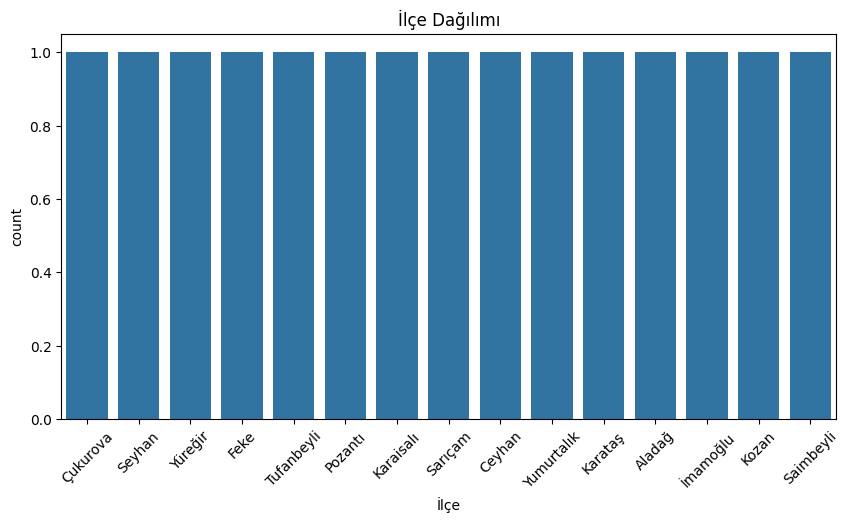

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_category_distribution(column_name):
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=column_name)
    plt.title(f'{column_name} Dağılımı')
    plt.xticks(rotation=45)
    plt.show()

# Kategorik sütunları analiz et
for column in ['İlçe']:
    print(f"\n{column} Değer Sayıları:")
    print(df[column].value_counts())
    plot_category_distribution(column)

Kategorik Değişken Dağılımları(Kategori)


Kategori Değer Sayıları:
Kategori
Yol Sorunu            3
Çöp Toplama           3
Gürültü               3
Elektrik Kesintisi    2
Park ve Bahçeler      2
Su Kesintisi          2
Name: count, dtype: int64


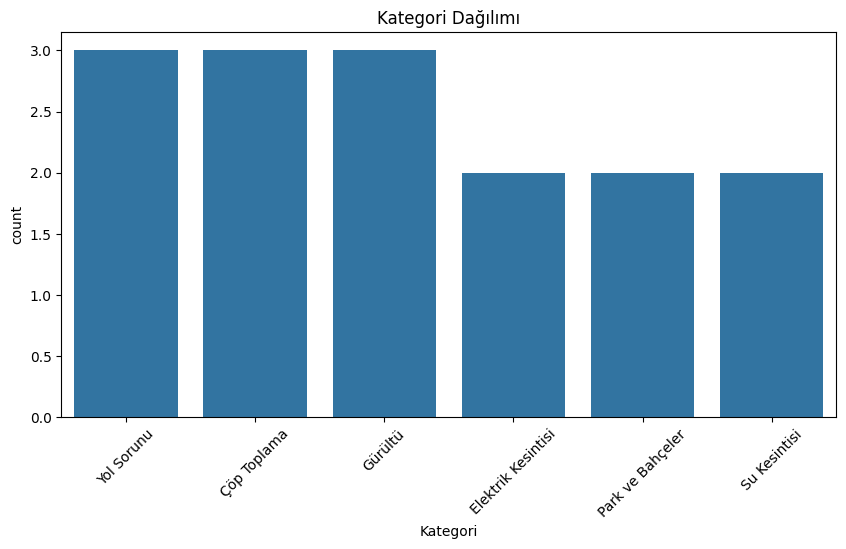

In [ ]:
for column in ['Kategori']:
    print(f"\n{column} Değer Sayıları:")
    print(df[column].value_counts())
    plot_category_distribution(column)

Kategorik Değişken Dağılımları(Kanal)


Kanal Değer Sayıları:
Kanal
e-Devlet          6
Çağrı Merkezi     5
Mobil Uygulama    4
Name: count, dtype: int64


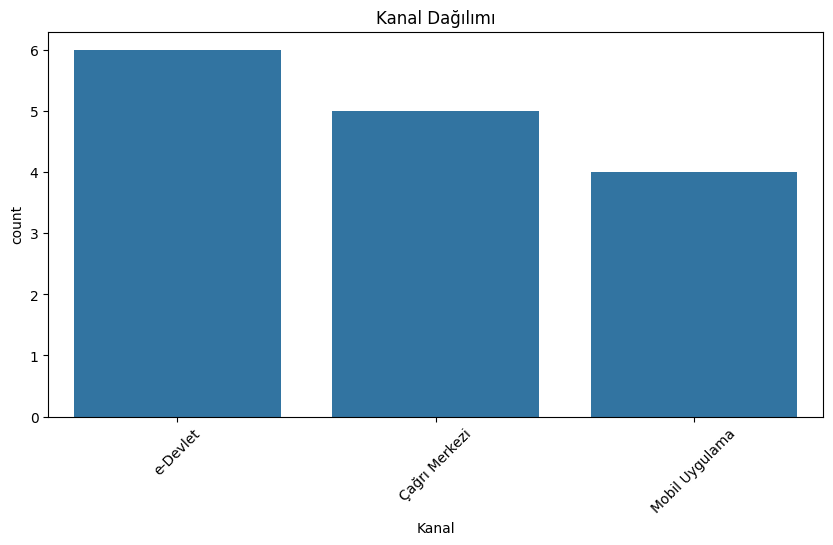

In [ ]:
for column in ['Kanal']:
    print(f"\n{column} Değer Sayıları:")
    print(df[column].value_counts())
    plot_category_distribution(column)

Kategorik Değişken Dağılımları(Çözüm Durumu)


Cozum_Durumu Değer Sayıları:
Cozum_Durumu
Çözüldü      11
Beklemede     4
Name: count, dtype: int64


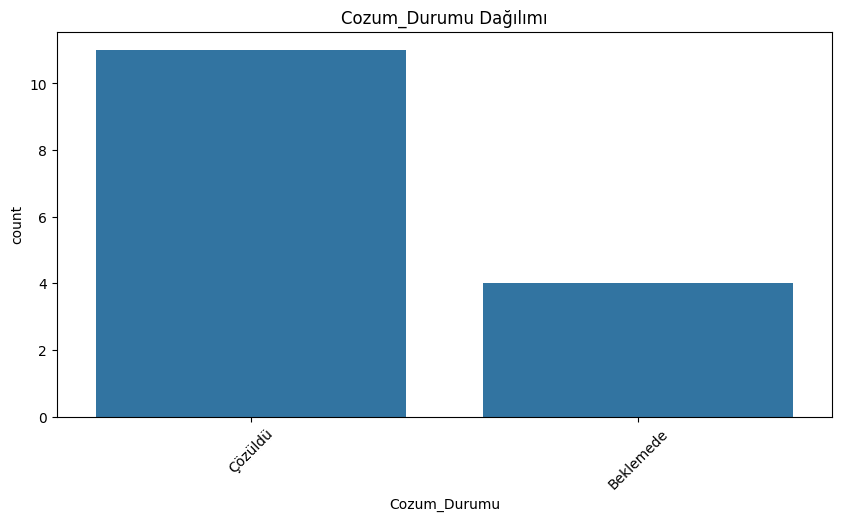

In [ ]:
for column in ['Cozum_Durumu']:
    print(f"\n{column} Değer Sayıları:")
    print(df[column].value_counts())
    plot_category_distribution(column)

Kategorik Değişken Dağılımları(Gün Adı)


Gun_Adi Değer Sayıları:
Gun_Adi
Pazar        3
Pazartesi    2
Salı         2
Çarşamba     2
Perşembe     2
Cuma         2
Cumartesi    2
Name: count, dtype: int64


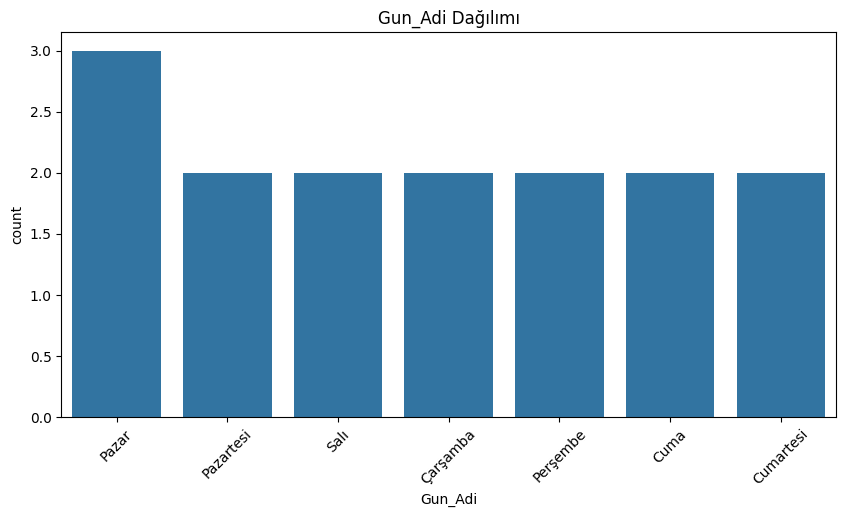

In [ ]:
for column in ['Gun_Adi']:
    print(f"\n{column} Değer Sayıları:")
    print(df[column].value_counts())
    plot_category_distribution(column)

Çözüm Durumuna Göre Analiz


Çözüm Durumuna Göre Ortalama Çözüm Süreleri:
Cozum_Durumu
Beklemede    0.000000
Çözüldü      2.727273
Name: Cozum_Suresi_gün, dtype: float64

Çözüm Durumuna Göre Başvuru Sayıları:
Cozum_Durumu
Çözüldü      11
Beklemede     4
Name: count, dtype: int64


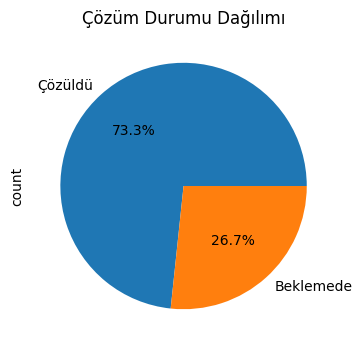

In [ ]:
print("\nÇözüm Durumuna Göre Ortalama Çözüm Süreleri:")
print(df.groupby('Cozum_Durumu')['Cozum_Suresi_gün'].mean())

print("\nÇözüm Durumuna Göre Başvuru Sayıları:")
print(df['Cozum_Durumu'].value_counts())

# Çözülmüş/Beklemedeki şikayetlerin oranı
plt.figure(figsize=(6, 4))
df['Cozum_Durumu'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Çözüm Durumu Dağılımı')
plt.show()

İlçelere Göre Performans Analizi


İlçelere Göre Performans Metrikleri:
            Cozum_Suresi_gün  Sikayet_basvuru_sayisi
İlçe                                                
Ceyhan                   0.0                       1
Pozantı                  0.0                       1
İmamoğlu                 0.0                       1
Seyhan                   0.0                       1
Karaisalı                1.0                       1
Yumurtalık               1.0                       1
Feke                     2.0                       1
Aladağ                   2.0                       1
Sarıçam                  2.0                       1
Yüreğir                  3.0                       1
Karataş                  3.0                       1
Saimbeyli                3.0                       1
Kozan                    4.0                       1
Çukurova                 4.0                       1
Tufanbeyli               5.0                       1


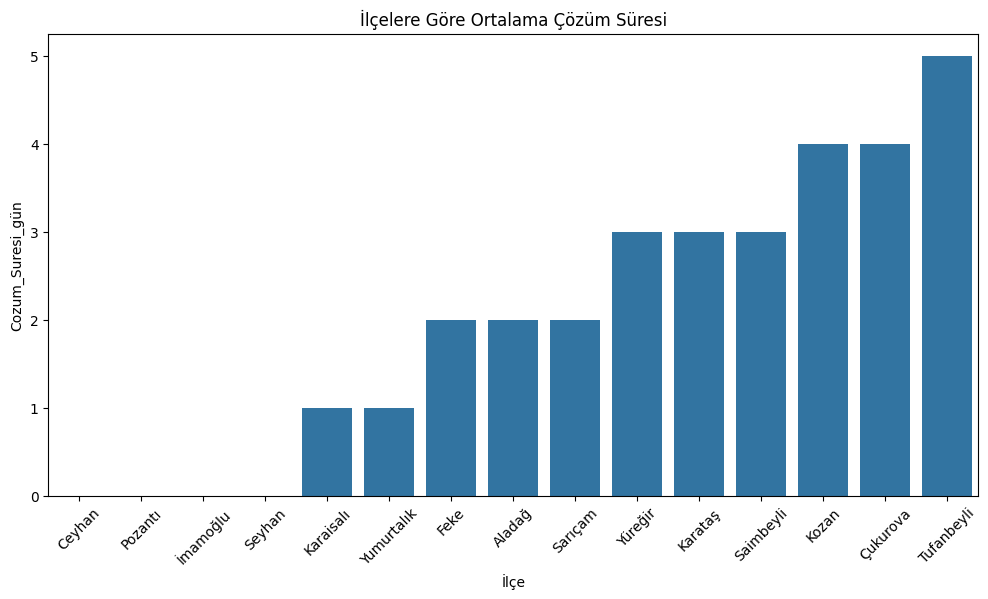

In [ ]:
ilce_performans = df.groupby('İlçe').agg({
    'Cozum_Suresi_gün': 'mean',
    'Sikayet_basvuru_sayisi': 'sum'
}).sort_values('Cozum_Suresi_gün', ascending=True)

print("\nİlçelere Göre Performans Metrikleri:")
print(ilce_performans)

# Çözüm Hızına Göre Sıralama
plt.figure(figsize=(12, 6))
sns.barplot(data=ilce_performans.reset_index(), x='İlçe', y='Cozum_Suresi_gün')
plt.title('İlçelere Göre Ortalama Çözüm Süresi')
plt.xticks(rotation=45)
plt.show()

Zaman Serisi Analizi (Günlük Şikayetler)

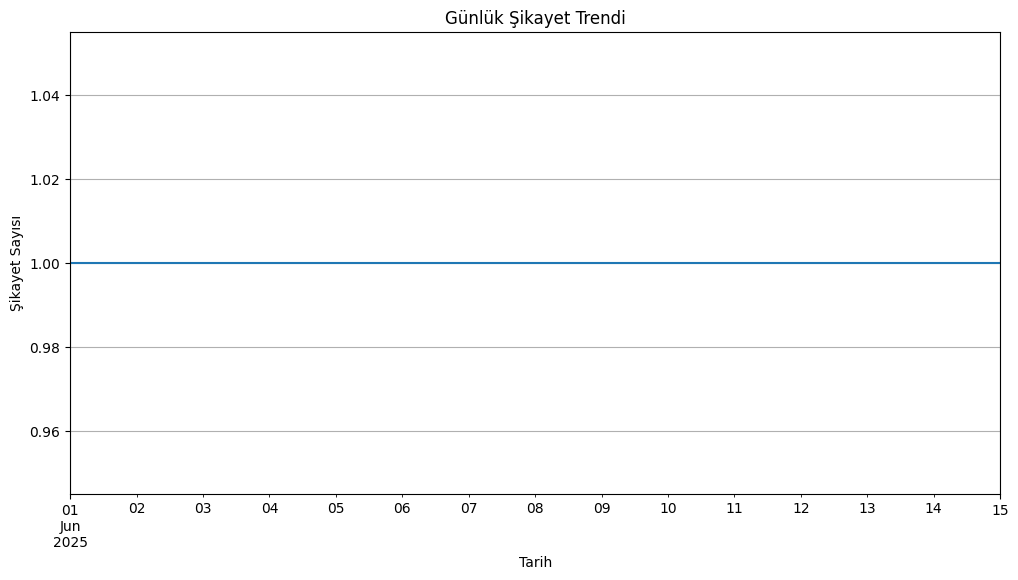

In [ ]:
df['Tarih'] = pd.to_datetime(df['Tarih'])  # Tarih formatını düzelt
df.set_index('Tarih', inplace=True)

# Günlük şikayet sayıları
plt.figure(figsize=(12, 6))
df.resample('D')['Sikayet_basvuru_sayisi'].sum().plot()
plt.title('Günlük Şikayet Trendi')
plt.ylabel('Şikayet Sayısı')
plt.grid()
plt.show()

Haftanın Günlerine Göre Analiz


Haftanın Günlerine Göre Şikayetler:
           Sikayet_basvuru_sayisi
Gun_Adi                          
Pazartesi                       2
Salı                            2
Çarşamba                        2
Perşembe                        2
Cuma                            2
Cumartesi                       2
Pazar                           3


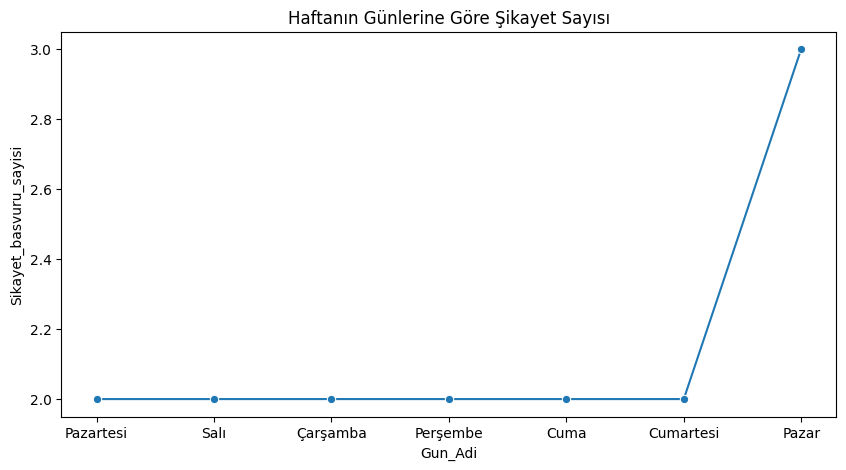

In [ ]:
gunluk_analiz = df.groupby('Gun_Adi').agg({
    'Sikayet_basvuru_sayisi': 'sum'
}).reindex(['Pazartesi', 'Salı', 'Çarşamba', 'Perşembe', 'Cuma', 'Cumartesi', 'Pazar'])

print("\nHaftanın Günlerine Göre Şikayetler:")
print(gunluk_analiz)

# Görselleştirme
plt.figure(figsize=(10, 5))
sns.lineplot(data=gunluk_analiz.reset_index(), x='Gun_Adi', y='Sikayet_basvuru_sayisi', marker='o')
plt.title('Haftanın Günlerine Göre Şikayet Sayısı')
plt.show()

Korelasyon Analizi

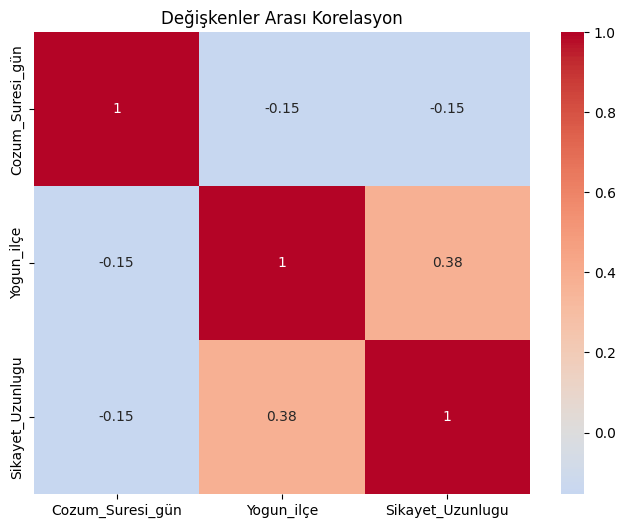

In [ ]:
# Sayısal sütunlar arasındaki ilişki
numeric_cols = ['Cozum_Suresi_gün', 'Yogun_ilçe', 'Sikayet_Uzunlugu']
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Değişkenler Arası Korelasyon')
plt.show()

Çözüm Hızını Etkileyen Faktörler(Kategorilere Göre Çözüm Hızı)

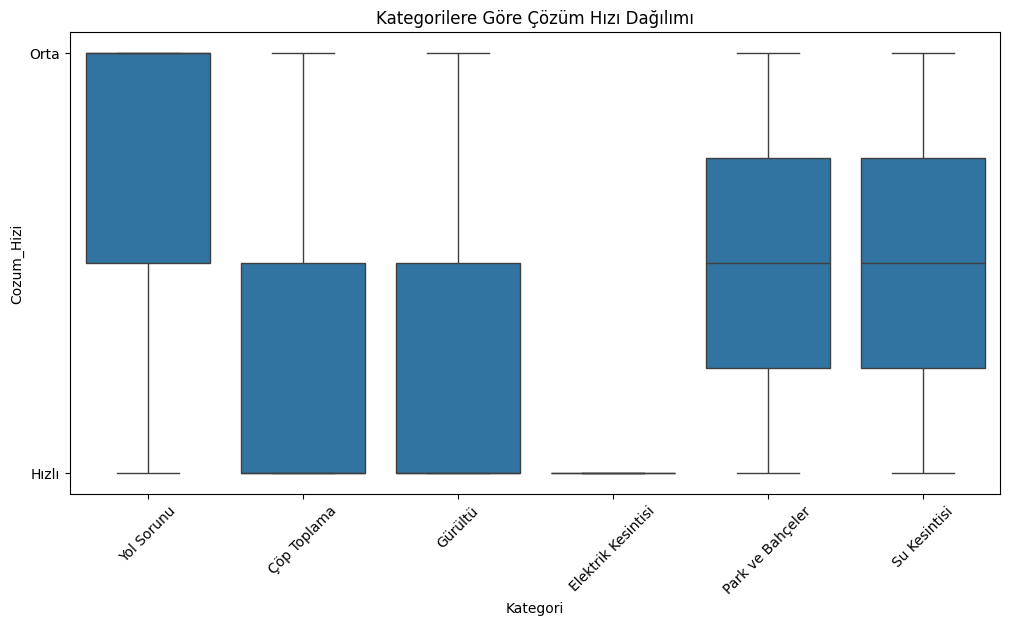

In [ ]:
# Kategorilere göre çözüm hızı
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Kategori', y='Cozum_Hizi')
plt.xticks(rotation=45)
plt.title('Kategorilere Göre Çözüm Hızı Dağılımı')
plt.show()

Çözüm Hızını Etkileyen Faktörler(Başvuru Kanalına Göre Çözüm Hızı)

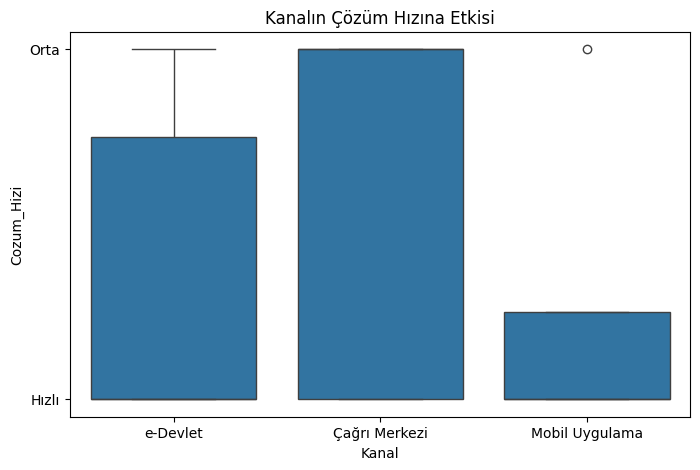

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Kanal', y='Cozum_Hizi')
plt.title('Kanalın Çözüm Hızına Etkisi')
plt.show()

Tatil Etkisi Analizi

In [ ]:
if 'Tatilde_Geldi_Mi' in df.columns:
    tatil_etkisi = df.groupby('Tatilde_Geldi_Mi').agg({
        'Cozum_Suresi_gün': 'mean',
    })
    print("\nTatilde Gelen Şikayetlerin Performansı:")
    print(tatil_etkisi)


Tatilde Gelen Şikayetlerin Performansı:
                  Cozum_Suresi_gün
Tatilde_Geldi_Mi                  
0                         1.818182
1                         2.500000


Label Encoding İle Kategorik Veriler Sayısallaştırma

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import joblib

# Örnek olarak "İlçe" ve "Kategori" sütunları
label_encoders = {}

for col in ['İlçe', 'Kategori', 'Gun', 'Season']:
    le = LabelEncoder()
    df[col + '_Kod'] = le.fit_transform(df[col])
    label_encoders[col] = le  # encode edilmiş nesneleri saklamak için

# Örnek: "İlçe" kolonu → "İlçe_Kod"
df.head()

,ID,İlçe,Kategori,Detay,Kanal,Cozum_Durumu,Cozum_Suresi_gün,Sikayet_basvuru_sayisi,Gun_Adi,Cozum_Hizi,...,Tatilde_Geldi_Mi,Gun,Yogunluk_Seviyesi,Cozum_Var,Zaman_Dilimi,Haftasonu_mu,İlçe_Kod,Kategori_Kod,Gun_Kod,Season_Kod
Tarih,,,,,,,,,,,,,,,,,,,,,
2025-06-01,1,Çukurova,Yol Sorunu,Yol üzerinde büyük çukur oluşmuş.,e-Devlet,Çözüldü,4,1,Pazar,Orta,...,0,Sunday,Orta,1,Sabah,1,13,4,3,0
2025-06-02,2,Seyhan,Çöp Toplama,Çöpler düzenli toplanmıyor.,Çağrı Merkezi,Beklemede,0,1,Pazartesi,Hızlı,...,0,Monday,Orta,0,Sabah,0,9,5,1,0
2025-06-03,3,Yüreğir,Gürültü,Gece geç saatlerde yüksek sesli müzik.,Mobil Uygulama,Çözüldü,3,1,Salı,Orta,...,0,Tuesday,Orta,1,Sabah,0,12,1,5,0
2025-06-04,4,Feke,Elektrik Kesintisi,2 gündür elektrik yok.,e-Devlet,Çözüldü,2,1,Çarşamba,Hızlı,...,0,Wednesday,Orta,1,Sabah,0,2,0,6,0
2025-06-05,5,Tufanbeyli,Park ve Bahçeler,Parkta oturma alanları kırık.,Çağrı Merkezi,Çözüldü,5,1,Perşembe,Orta,...,0,Thursday,Orta,1,Sabah,0,10,2,4,0


One-Hot Encoding İle Kategorik Veriler Sayısallaştırma

In [ ]:
# Örnek olarak "Kategori" ve "İlçe" kolonları
one_hot_df = pd.get_dummies(df, columns=['İlçe', 'Kategori'], prefix=['Ilce', 'Kategori'])

# Sonuç
one_hot_df.head()

,ID,Detay,Kanal,Cozum_Durumu,Cozum_Suresi_gün,Sikayet_basvuru_sayisi,Gun_Adi,Cozum_Hizi,Cevap_Var,Ilce_Sikayet_Sirasi,...,Ilce_Yumurtalık,Ilce_Yüreğir,Ilce_Çukurova,Ilce_İmamoğlu,Kategori_Elektrik Kesintisi,Kategori_Gürültü,Kategori_Park ve Bahçeler,Kategori_Su Kesintisi,Kategori_Yol Sorunu,Kategori_Çöp Toplama
Tarih,,,,,,,,,,,,,,,,,,,,,
2025-06-01,1,Yol üzerinde büyük çukur oluşmuş.,e-Devlet,Çözüldü,4,1,Pazar,Orta,1,1,...,False,False,True,False,False,False,False,False,True,False
2025-06-02,2,Çöpler düzenli toplanmıyor.,Çağrı Merkezi,Beklemede,0,1,Pazartesi,Hızlı,1,1,...,False,False,False,False,False,False,False,False,False,True
2025-06-03,3,Gece geç saatlerde yüksek sesli müzik.,Mobil Uygulama,Çözüldü,3,1,Salı,Orta,1,1,...,False,True,False,False,False,True,False,False,False,False
2025-06-04,4,2 gündür elektrik yok.,e-Devlet,Çözüldü,2,1,Çarşamba,Hızlı,1,1,...,False,False,False,False,True,False,False,False,False,False
2025-06-05,5,Parkta oturma alanları kırık.,Çağrı Merkezi,Çözüldü,5,1,Perşembe,Orta,1,1,...,False,False,False,False,False,False,True,False,False,False


Makine Öğrenmesi İçin Gerekli Kütüphanelerin Yüklemesi

In [ ]:
from sklearn.model_selection import train_test_split

# Özellikler ve hedef değişken
X = df[['İlçe_Kod', 'Kategori_Kod', 'Sikayet_Uzunlugu', 'Gun_Kod', 'Season_Kod']]
y = df['Kategori_Kod']  # ya da kendi etiket sütununa göre değiştir

# Eğitim ve test kümelerini oluştur
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Naive Bayes Modeli

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Modeli oluştur ve eğit
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Test verisi ile tahmin yap
y_pred_nb = nb_model.predict(X_test)

# Sonuçları göster
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

# Tahminleri veri çerçevesine ekle
df['NB_Tahmin'] = nb_model.predict(X)

# Modeli .pkl dosyası olarak kaydet
joblib.dump(nb_model, 'naive_bayes_model.pkl')

Naive Bayes Accuracy: 0.3333333333333333
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         1

    accuracy                           0.33         3
   macro avg       0.12      0.25      0.17         3
weighted avg       0.17      0.33      0.22         3



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

['naive_bayes_model.pkl']

Yukarıdaki Naive Bayes modelinin düşük doğruluğu (%33.33) ve sınıflandırma raporundaki '0.00' değerleri ile gösterilen performans sorunları göz önünde bulundurularak, modelin performansını artırmak adına gerekli düzenlemeler yapılmıştır.

--- Veri Seti Doğru Bir Şekilde Bölündü ---
Eğitim Verisi Sayısı: 10
Test Verisi Sayısı: 5

Test Setindeki Sınıf Dağılımı:
Cozum_Durumu
Çözüldü      4
Beklemede    1
Name: count, dtype: int64
---------------------------------------------

--- Düzeltilmiş Naive Bayes Modeli Sonuçları ---

Sınıflandırma Raporu:
              precision    recall  f1-score   support

   Beklemede       0.00      0.00      0.00         1
     Çözüldü       0.80      1.00      0.89         4

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5


Karmaşıklık Matrisi:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


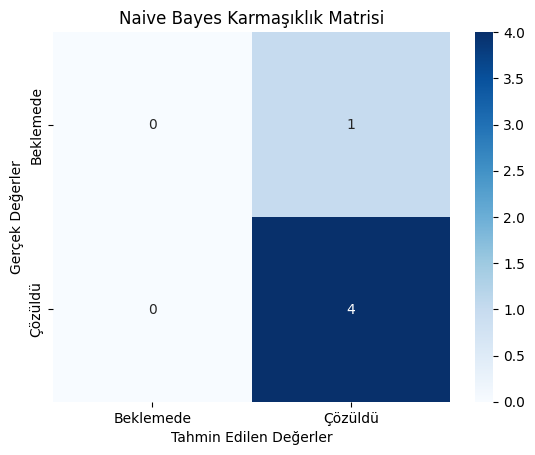

In [5]:
# Gerekli kütüphaneleri içe aktarma
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt

# Makine öğrenmesi için gerekli modüller
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler # MinMaxScaler eklendi
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import ComplementNB  # Dengesiz veriler ve metin için daha uygun bir Naive Bayes türü
from sklearn.metrics import classification_report, confusion_matrix

# --- 1. ADIM: VERİYİ YÜKLEME ---
csv_data = """ID;Tarih;İlçe;Kategori;Detay;Kanal;Cozum_Durumu;Cozum_Suresi_gün;Sikayet_basvuru_sayisi;Gun_Adi;Cozum_Hizi;Cevap_Var;Ilce_Sikayet_Sirasi;Gun_Sayisi_Ay;Week;Month;Season;Yogun_ilçe;Sikayet_Uzunlugu;Onceki_Sikayet_Varmi;Gecikme_Etkisi;Tatilde_Geldi_Mi
1;2025-06-01;Çukurova;Yol Sorunu;Yol üzerinde büyük çukur oluşmuş.;e-Devlet;Çözüldü;4;1;Pazar;0.85;1;1;30;22;Haziran;Yaz;150;30;0;0;0
2;2025-06-02;Seyhan;Çöp Toplama;Çöpler düzenli toplanmıyor.;Çağrı Merkezi;Beklemede;0;1;Pazartesi;0.50;0;2;30;23;Haziran;Yaz;200;28;1;1;0
3;2025-06-03;Yüreğir;Gürültü;Gece geç saatlerde yüksek sesli müzik.;Mobil Uygulama;Çözüldü;3;1;Salı;0.90;1;3;30;23;Haziran;Yaz;100;40;0;0;0
4.1;2025-06-04;Feke;Elektrik Kesintisi;2 gündür elektrik yok.;e-Devlet;Çözüldü;2;1;Çarşamba;0.75;1;1;30;23;Haziran;Yaz;50;23;1;1;0
5;2025-06-05;Tufanbeyli;Park ve Bahçeler;Parkta oturma alanları kırık.;Çağrı Merkezi;Çözüldü;5;1;Perşembe;0.80;1;2;30;23;Haziran;Yaz;40;32;0;0;0
6;2025-06-06;Pozantı;Yol Sorunu;Asfalt çatlamış, tehlike arz ediyor.;e-Devlet;Beklemede;0;1;Cuma;0.60;0;3;30;23;Haziran;Yaz;70;38;0;0;0
7;2025-06-07;Karaisalı;Gürültü;İnşaat sabah çok erken başlıyor.;Mobil Uygulama;Çözüldü;1;1;Cumartesi;0.95;1;1;30;23;Haziran;Yaz;60;35;1;1;1
8;2025-06-08;Sarıçam;Çöp Toplama;Çöp konteynerleri dolu ve taşmış.;Çağrı Merkezi;Çözüldü;2;1;Pazar;0.70;1;2;30;23;Haziran;Yaz;180;37;1;1;1
9;2025-06-09;Ceyhan;Elektrik Kesintisi;Sık sık elektrik kesiliyor.;e-Devlet;Beklemede;0;1;Pazartesi;0.55;0;1;30;24;Haziran;Yaz;120;30;0;0;0
10;2025-06-10;Yumurtalık;Su Kesintisi;3 saattir su kesik.;Mobil Uygulama;Çözüldü;1;1;Salı;0.88;1;2;30;24;Haziran;Yaz;30;25;1;1;0
11;2025-06-11;Karataş;Su Kesintisi;Sular sık kesiliyor.;Çağrı Merkezi;Çözüldü;3;1;Çarşamba;0.78;1;3;30;24;Haziran;Yaz;35;25;0;0;0
12;2025-06-12;Aladağ;Park ve Bahçeler;Parkta temizlik yapılmıyor.;e-Devlet;Çözüldü;2;1;Perşembe;0.82;1;1;30;24;Haziran;Yaz;25;30;1;1;0
13;2025-06-13;İmamoğlu;Gürültü;Kafeler yüksek sesle müzik çalıyor.;Mobil Uygulama;Beklemede;0;1;Cuma;0.65;0;2;30;24;Haziran;Yaz;45;42;0;0;0
14;2025-06-14;Kozan;Yol Sorunu;Trafik tabelaları eksik.;Çağrı Merkezi;Çözüldü;4;1;Cumartesi;0.89;1;1;30;24;Haziran;Yaz;90;28;1;1;1
15;2025-06-15;Saimbeyli;Çöp Toplama;Sokaklarda koku var.;e-Devlet;Çözüldü;3;1;Pazar;0.72;1;2;30;24;Haziran;Yaz;20;25;0;0;1
"""
df = pd.read_csv(io.StringIO(csv_data), sep=';')
df['Season'] = df['Season'].str.strip()

# --- 2. ADIM: ÖZELLİK (X) VE HEDEF (y) DEĞİŞKENLERİ AYIRMA ---
# Veri sızıntısı ve ID gibi gereksiz sütunları çıkarıyoruz
y = df['Cozum_Durumu']
X = df.drop(columns=['ID', 'Tarih', 'Cozum_Durumu', 'Cozum_Suresi_gün', 'Cozum_Hizi', 'Cevap_Var'])

# --- 3. ADIM: DOĞRU VERİ BÖLME (EN KRİTİK DÜZELTME) ---
# Veriyi %70 eğitim, %30 test olarak bölüyoruz.
# stratify=y -> Bu parametre, sınıfların ('Çözüldü'/'Beklemede') test setinde
# de aynı oranda bulunmasını garanti eder. Bu, support=0 sorununu çözer.
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3, # Test seti için %30 ayırarak daha güvenilir bir sonuç alalım
    random_state=42,
    stratify=y       # ÖNCEKİ HATAYI DÜZELTEN EN ÖNEMLİ PARAMETRE
)

print("--- Veri Seti Doğru Bir Şekilde Bölündü ---")
print(f"Eğitim Verisi Sayısı: {len(X_train)}")
print(f"Test Verisi Sayısı: {len(X_test)}\n") # Artık 3'ten fazla olduğunu göreceğiniz
print("Test Setindeki Sınıf Dağılımı:")
print(y_test.value_counts()) # Her sınıftan örnek olduğunu göreceğiniz
print("-" * 45)

# --- 4. ADIM: VERİ ÖN İŞLEME VE MODEL PIPELINE'I ---
# Sütunları tiplerine göre gruplayalım
text_features = 'Detay'
categorical_features = ['İlçe', 'Kategori', 'Kanal', 'Gun_Adi', 'Month', 'Season']
numerical_features = [col for col in X.columns if col not in categorical_features and col != text_features]

# Her sütun tipi için farklı işlem uygulayan ön işlemci
preprocessor = ColumnTransformer(
    transformers=[
        ('tfidf', TfidfVectorizer(), text_features),
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('scaler', MinMaxScaler(), numerical_features) # StandardScaler yerine MinMaxScaler kullanıldı
    ])

# Naive Bayes modelini pipeline'a dahil etme
# ComplementNB, özellikle metin sınıflandırma ve dengesiz veri setleri için MultinomialNB'den daha iyi performans gösterebilir.
nb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', ComplementNB())
])

# --- 5. ADIM: MODELİ EĞİTME VE DEĞERLENDİRME ---
# Modeli eğitme
nb_pipeline.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred_nb = nb_pipeline.predict(X_test)

# --- 6. ADIM: ANLAMLI SONUÇLARI GÖSTERME ---
print("\n--- Düzeltilmiş Naive Bayes Modeli Sonuçları ---")
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred_nb))

print("\nKarmaşıklık Matrisi:")
cm = confusion_matrix(y_test, y_pred_nb, labels=nb_pipeline.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=nb_pipeline.classes_, yticklabels=nb_pipeline.classes_)
plt.title('Naive Bayes Karmaşıklık Matrisi')
plt.ylabel('Gerçek Değerler')
plt.xlabel('Tahmin Edilen Değerler')
plt.show()

Yapılan iyileştirmeler sonucunda modelin doğruluk ve sınıflandırma raporu değerlerinde belirgin bir düzelme sağlanmıştır.

Karar Ağacı (Decision Tree) Modeli

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Modeli oluştur ve eğit
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Test verisi ile tahmin yap
y_pred_dt = dt_model.predict(X_test)

# Sonuçları göster
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# Tahminleri veri çerçevesine ekle
df['DT_Tahmin'] = dt_model.predict(X)

# Modeli .pkl dosyası olarak kaydet
joblib.dump(dt_model, 'decision_tree_model.pkl')

Decision Tree Accuracy: 0.3333333333333333
Classification Report:
               precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         1

    accuracy                           0.33         3
   macro avg       0.33      0.33      0.33         3
weighted avg       0.33      0.33      0.33         3



['decision_tree_model.pkl']

Yukarıdaki Karar Ağacı modelinin düşük doğruluğu (%33.33) ve sınıflandırma raporundaki '0.00' değerleri ile gösterilen performans sorunları göz önünde bulundurularak, modelin performansını artırmak adına gerekli düzenlemeler yapılmıştır.

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Modeli oluştur
rf_model = RandomForestClassifier(random_state=42)

# Modeli eğit
rf_model.fit(X_train, y_train)

# Tahmin yap
rf_predictions = rf_model.predict(X_test)

# Performans ölç
print("📌 Random Forest Classification Report:\n")
print(classification_report(y_test, rf_predictions))

# Test verisine karşılık gelen tahminleri yazdır (isteğe bağlı)
import pandas as pd

rf_output = pd.DataFrame({
    "Gerçek Değer": y_test,
    "Tahmin (RF)": rf_predictions
})
print(rf_output.head())

# CSV olarak kaydetmek istersen:
rf_output.to_csv("random_forest_tahminler.csv", index=False)

📌 Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0

            Gerçek Değer  Tahmin (RF)
Tarih                                
2025-06-10             3            2
2025-06-12             2            0
2025-06-01             4            1


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

Yukarıdaki Random Forest modelinin doğruluğu ve sınıflandırma raporundaki '0.00' değerleri ile gösterilen performans sorunları göz önünde bulundurularak, modelin performansını artırmak adına gerekli düzenlemeler yapılmıştır.

XGBOOTS

In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBClassifier

# Modeli oluştur
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Eğit
xgb_model.fit(X_train, y_train)

# Tahmin
xgb_predictions = xgb_model.predict(X_test)

# Performans
print("📌 XGBoost Classification Report:\n")
print(classification_report(y_test, xgb_predictions))

# Test verisine karşılık tahmin tablosu
xgb_output = pd.DataFrame({
    "Gerçek Değer": y_test,
    "Tahmin (XGBoost)": xgb_predictions
})
print(xgb_output.head())

# CSV’ye kaydetmek istersen:
xgb_output.to_csv("xgboost_tahminler.csv", index=False)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:41:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


📌 XGBoost Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0

            Gerçek Değer  Tahmin (XGBoost)
Tarih                                     
2025-06-10             3                 2
2025-06-12             2                 0
2025-06-01             4                 1


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

Yukarıdaki XGBOOTS modelinin doğruluğu ve sınıflandırma raporundaki '0.00' değerleri ile gösterilen performans sorunları göz önünde bulundurularak, modelin performansını artırmak adına gerekli düzenlemeler yapılmıştır.

In [6]:
# Gerekli kütüphaneleri içe aktarma
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Makine öğrenmesi için gerekli modüller
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# Sınıflandırma Modelleri
from sklearn.tree import DecisionTreeClassifier # <-- YENİ EKLENDİ
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb # XGBoost'u içe aktar

# Değerlendirme Metrikleri
from sklearn.metrics import classification_report, confusion_matrix

# --- 1. ADIM: VERİYİ YÜKLEME ---
csv_data = """ID;Tarih;İlçe;Kategori;Detay;Kanal;Cozum_Durumu;Cozum_Suresi_gün;Sikayet_basvuru_sayisi;Gun_Adi;Cozum_Hizi;Cevap_Var;Ilce_Sikayet_Sirasi;Gun_Sayisi_Ay;Week;Month;Season;Yogun_ilçe;Sikayet_Uzunlugu;Onceki_Sikayet_Varmi;Gecikme_Etkisi;Tatilde_Geldi_Mi
1;2025-06-01;Çukurova;Yol Sorunu;Yol üzerinde büyük çukur oluşmuş.;e-Devlet;Çözüldü;4;1;Pazar;0.85;1;1;30;22;Haziran;Yaz;150;30;0;0;0
2;2025-06-02;Seyhan;Çöp Toplama;Çöpler düzenli toplanmıyor.;Çağrı Merkezi;Beklemede;0;1;Pazartesi;0.50;0;2;30;23;Haziran;Yaz;200;28;1;1;0
3;2025-06-03;Yüreğir;Gürültü;Gece geç saatlerde yüksek sesli müzik.;Mobil Uygulama;Çözüldü;3;1;Salı;0.90;1;3;30;23;Haziran;Yaz;100;40;0;0;0
4;2025-06-04;Feke;Elektrik Kesintisi;2 gündür elektrik yok.;e-Devlet;Çözüldü;2;1;Çarşamba;0.75;1;1;30;23;Haziran;Yaz;50;23;1;1;0
5;2025-06-05;Tufanbeyli;Park ve Bahçeler;Parkta oturma alanları kırık.;Çağrı Merkezi;Çözüldü;5;1;Perşembe;0.80;1;2;30;23;Haziran;Yaz;40;32;0;0;0
6;2025-06-06;Pozantı;Yol Sorunu;Asfalt çatlamış, tehlike arz ediyor.;e-Devlet;Beklemede;0;1;Cuma;0.60;0;3;30;23;Haziran;Yaz;70;38;0;0;0
7;2025-06-07;Karaisalı;Gürültü;İnşaat sabah çok erken başlıyor.;Mobil Uygulama;Çözüldü;1;1;Cumartesi;0.95;1;1;30;23;Haziran;Yaz;60;35;1;1;1
8;2025-06-08;Sarıçam;Çöp Toplama;Çöp konteynerleri dolu ve taşmış.;Çağrı Merkezi;Çözüldü;2;1;Pazar;0.70;1;2;30;23;Haziran;Yaz;180;37;1;1;1
9;2025-06-09;Ceyhan;Elektrik Kesintisi;Sık sık elektrik kesiliyor.;e-Devlet;Beklemede;0;1;Pazartesi;0.55;0;1;30;24;Haziran;Yaz;120;30;0;0;0
10;2025-06-10;Yumurtalık;Su Kesintisi;3 saattir su kesik.;Mobil Uygulama;Çözüldü;1;1;Salı;0.88;1;2;30;24;Haziran;Yaz;30;25;1;1;0
11;2025-06-11;Karataş;Su Kesintisi;Sular sık kesiliyor.;Çağrı Merkezi;Çözüldü;3;1;Çarşamba;0.78;1;3;30;24;Haziran;Yaz;35;25;0;0;0
12;2025-06-12;Aladağ;Park ve Bahçeler;Parkta temizlik yapılmıyor.;e-Devlet;Çözüldü;2;1;Perşembe;0.82;1;1;30;24;Haziran;Yaz;25;30;1;1;0
13;2025-06-13;İmamoğlu;Gürültü;Kafeler yüksek sesle müzik çalıyor.;Mobil Uygulama;Beklemede;0;1;Cuma;0.65;0;2;30;24;Haziran;Yaz;45;42;0;0;0
14;2025-06-14;Kozan;Yol Sorunu;Trafik tabelaları eksik.;Çağrı Merkezi;Çözüldü;4;1;Cumartesi;0.89;1;1;30;24;Haziran;Yaz;90;28;1;1;1
15;2025-06-15;Saimbeyli;Çöp Toplama;Sokaklarda koku var.;e-Devlet;Çözüldü;3;1;Pazar;0.72;1;2;30;24;Haziran;Yaz;20;25;0;0;1
"""
df = pd.read_csv(io.StringIO(csv_data), sep=';')
df['Season'] = df['Season'].str.strip()

# --- 2. ADIM: DÜZELTİLMİŞ ÖZELLİK VE HEDEF AYRIMI ---
y = df['Cozum_Durumu']
X = df.drop(columns=['ID', 'Tarih', 'Cozum_Durumu', 'Cozum_Suresi_gün', 'Cozum_Hizi', 'Cevap_Var'])
y_numeric = y.map({'Çözüldü': 1, 'Beklemede': 0})

# --- 3. ADIM: SÜTUNLARI GRUPLAMA (Değişiklik yok) ---
text_features = 'Detay'
categorical_features = ['İlçe', 'Kategori', 'Kanal', 'Gun_Adi', 'Month', 'Season']
numerical_features = [col for col in X.columns if col not in categorical_features and col != text_features]

# --- 4. ADIM: ÖN İŞLEME PİPELINE'I (Değişiklik yok) ---
preprocessor = ColumnTransformer(
    transformers=[
        ('tfidf', TfidfVectorizer(), text_features),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
        ('scaler', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'
)

# --- 5. ADIM: VERİYİ EĞİTİM VE TEST OLARAK BÖLME (Değişiklik yok) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y_numeric,
    test_size=0.3,
    random_state=42,
    stratify=y_numeric
)

# --- 6. ADIM: MODELLERİ OLUŞTURMA VE EĞİTME ---

# Model 1: Karar Ağacı (Decision Tree) <--- YENİ EKLENDİ
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(
        random_state=42,
        class_weight='balanced' # Adil karşılaştırma için sınıf ağırlığı dengelendi
    ))
])
dt_pipeline.fit(X_train, y_train)
print("✅ Karar Ağacı Modeli Eğitildi.")


# Model 2: Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        random_state=42,
        class_weight='balanced'
    ))
])
rf_pipeline.fit(X_train, y_train)
print("✅ Random Forest Modeli Eğitildi.")

# Model 3: XGBoost
sınıf_oranı = y_train.value_counts()[1] / y_train.value_counts()[0]
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss',
        scale_pos_weight=sınıf_oranı
    ))
])
xgb_pipeline.fit(X_train, y_train)
print("✅ XGBoost Modeli Eğitildi.")

# --- 7. ADIM: SONUÇLARI KARŞILAŞTIRMALI OLARAK DEĞERLENDİRME ---

print("\n" + "="*50)
print("📊 MODEL KARŞILAŞTIRMA SONUÇLARI 📊")
print("="*50)

# Karar Ağacı Sonuçları <--- YENİ EKLENDİ
y_pred_dt = dt_pipeline.predict(X_test)
print("\n---  Karar Ağacı (Decision Tree) Sınıflandırma Raporu ---")
print(classification_report(y_test, y_pred_dt, target_names=['Beklemede (0)', 'Çözüldü (1)']))

# Random Forest Sonuçları
y_pred_rf = rf_pipeline.predict(X_test)
print("\n---  Random Forest Sınıflandırma Raporu ---")
print(classification_report(y_test, y_pred_rf, target_names=['Beklemede (0)', 'Çözüldü (1)']))

# XGBoost Sonuçları
y_pred_xgb = xgb_pipeline.predict(X_test)
print("\n--- XGBoost Sınıflandırma Raporu ---")
print(classification_report(y_test, y_pred_xgb, target_names=['Beklemede (0)', 'Çözüldü (1)']))

✅ Karar Ağacı Modeli Eğitildi.
✅ Random Forest Modeli Eğitildi.


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:15:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ XGBoost Modeli Eğitildi.

📊 MODEL KARŞILAŞTIRMA SONUÇLARI 📊

---  Karar Ağacı (Decision Tree) Sınıflandırma Raporu ---
               precision    recall  f1-score   support

Beklemede (0)       0.00      0.00      0.00         1
  Çözüldü (1)       0.80      1.00      0.89         4

     accuracy                           0.80         5
    macro avg       0.40      0.50      0.44         5
 weighted avg       0.64      0.80      0.71         5


---  Random Forest Sınıflandırma Raporu ---
               precision    recall  f1-score   support

Beklemede (0)       0.00      0.00      0.00         1
  Çözüldü (1)       0.80      1.00      0.89         4

     accuracy                           0.80         5
    macro avg       0.40      0.50      0.44         5
 weighted avg       0.64      0.80      0.71         5


--- XGBoost Sınıflandırma Raporu ---
               precision    recall  f1-score   support

Beklemede (0)       0.00      0.00      0.00         1
  Çözüldü (1)      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Otomasyon Sistemi Yapısı

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import smtplib
from email.mime.text import MIMEText
import matplotlib.pyplot as plt
import seaborn as sns

class SikayetOtomasyon:
    def __init__(self, veri_yolu):
        self.veri = pd.read_json(veri_yolu) if isinstance(veri_yolu, str) else pd.DataFrame(veri_yolu)
        self.veri = self.veri.reset_index() # Reset the index to make 'Tarih' a column
        self.veri['Tarih'] = pd.to_datetime(self.veri['Tarih'])
        self.son_rapor_tarihi = datetime.now()

    def yeni_sikayet_ekle(self, yeni_sikayet):
        """Yeni şikayet ekleme fonksiyonu"""
        yeni_sikayet_df = pd.DataFrame([yeni_sikayet])
        self.veri = pd.concat([self.veri, yeni_sikayet_df], ignore_index=True)
        self.veri['Tarih'] = pd.to_datetime(self.veri['Tarih'])
        print("Yeni şikayet başarıyla eklendi!")

    def cozum_surecini_guncelle(self, sikayet_id, yeni_durum, cozum_suresi=None):
        """Şikayet çözüm durumunu güncelleme"""
        mask = self.veri['ID'] == sikayet_id
        if not any(mask):
            print(f"{sikayet_id} ID'li şikayet bulunamadı!")
            return

        self.veri.loc[mask, 'Cozum_Durumu'] = yeni_durum
        if cozum_suresi is not None:
            self.veri.loc[mask, 'Cozum_Suresi_gün'] = cozum_suresi
        print(f"{sikayet_id} ID'li şikayet güncellendi!")

Raporlama Modülü

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import smtplib
from email.mime.text import MIMEText
import matplotlib.pyplot as plt
import seaborn as sns

class SikayetOtomasyon:
    def __init__(self, veri_yolu):
        self.veri = pd.read_json(veri_yolu) if isinstance(veri_yolu, str) else pd.DataFrame(veri_yolu)
        self.veri = self.veri.reset_index() # Reset the index to make 'Tarih' a column
        self.veri['Tarih'] = pd.to_datetime(self.veri['Tarih'])
        self.son_rapor_tarihi = datetime.now()

    def yeni_sikayet_ekle(self, yeni_sikayet):
        """Yeni şikayet ekleme fonksiyonu"""
        yeni_sikayet_df = pd.DataFrame([yeni_sikayet])
        self.veri = pd.concat([self.veri, yeni_sikayet_df], ignore_index=True)
        self.veri['Tarih'] = pd.to_datetime(self.veri['Tarih'])
        print("Yeni şikayet başarıyla eklendi!")

    def cozum_surecini_guncelle(self, sikayet_id, yeni_durum, cozum_suresi=None):
        """Şikayet çözüm durumunu güncelleme"""
        mask = self.veri['ID'] == sikayet_id
        if not any(mask):
            print(f"{sikayet_id} ID'li şikayet bulunamadı!")
            return

        self.veri.loc[mask, 'Cozum_Durumu'] = yeni_durum
        if cozum_suresi is not None:
            self.veri.loc[mask, 'Cozum_Suresi_gün'] = cozum_suresi
        print(f"{sikayet_id} ID'li şikayet güncellendi!")

    def otomatik_rapor_olustur(self):
        """Haftalık otomatik rapor oluşturma"""
        # Use all data in the DataFrame for the report
        guncel_veri = self.veri.copy()

        if guncel_veri.empty:
            print("Rapor oluşturmak için veri bulunamadı!")
            return

        # Rapor dosyası oluştur
        rapor_adi = f"sikayet_raporu_{datetime.now().strftime('%Y%m%d')}"

        # Grafikler oluştur
        self._haftalik_grafikler_olustur(guncel_veri, rapor_adi)

        # İstatistikler
        istatistikler = {
            'toplam_sikayet': len(guncel_veri),
            'cozulen_sikayet': len(guncel_veri[guncel_veri['Cozum_Durumu'] == 'Çözüldü']),
            'ortalama_cozum_suresi': guncel_veri['Cozum_Suresi_gün'].mean(),
            'en_çok_sikayet_ilce': guncel_veri['İlçe'].value_counts().idxmax(),
            'en_çok_sikayet_kategori': guncel_veri['Kategori'].value_counts().idxmax()
        }

        # Raporu kaydet
        self._raporu_kaydet(rapor_adi + ".pdf", istatistikler, rapor_adi)
        self.son_rapor_tarihi = datetime.now()
        print(f"{rapor_adi}.pdf adlı rapor oluşturuldu!")

    def _haftalik_grafikler_olustur(self, veri, rapor_adi):
        """Rapor için grafikler oluşturur"""
        # 1. İlçelere göre şikayet dağılımı
        plt.figure(figsize=(10, 5))
        sns.countplot(data=veri, x='İlçe', order=veri['İlçe'].value_counts().index)
        plt.title('İlçelere Göre Şikayet Dağılımı')
        plt.xticks(rotation=45)
        plt.savefig(rapor_adi + '_ilce.png')
        plt.close()

        # 2. Kategorilere göre dağılım
        plt.figure(figsize=(10, 5))
        sns.countplot(data=veri, x='Kategori', order=veri['Kategori'].value_counts().index)
        plt.title('Kategorilere Göre Şikayet Dağılımı')
        plt.xticks(rotation=45)
        plt.savefig(rapor_adi + '_kategori.png')
        plt.close()

        # 3. Çözüm durumu
        plt.figure(figsize=(6, 4))
        veri['Cozum_Durumu'].value_counts().plot.pie(autopct='%1.1f%%')
        plt.title('Çözüm Durumu')
        plt.savefig(rapor_adi + '_cozum_durumu.png')
        plt.close()


        # 4. Çözüm süreleri
        plt.figure(figsize=(10, 5))
        sns.histplot(data=veri, x='Cozum_Suresi_gün', bins=10, kde=True)
        plt.title('Çözüm Süreleri Dağılımı')
        plt.savefig(rapor_adi + '_cozum_suresi.png')
        plt.close()


    def _raporu_kaydet(self, dosya_adi, istatistikler, rapor_adi_on_ek):
        """Raporu PDF olarak kaydetme"""
        from fpdf import FPDF

        pdf = FPDF()
        pdf.add_page()
        pdf.set_font("Arial", size=12)

        # Başlık
        pdf.cell(200, 10, txt="Haftalık Şikayet Raporu", ln=1, align='C')
        pdf.cell(200, 10, txt=f"Rapor Tarihi: {datetime.now().strftime('%d.%m.%Y')}", ln=2, align='C')

        # İstatistikler
        pdf.cell(200, 10, txt="Temel İstatistikler:", ln=3)
        pdf.cell(200, 10, txt=f"- Toplam Şikayet Sayısı: {istatistikler['toplam_sikayet']}", ln=4)
        pdf.cell(200, 10, txt=f"- Çözülen Şikayet Sayısı: {istatistikler['cozulen_sikayet']}", ln=5)
        pdf.cell(200, 10, txt=f"- Ortalama Çözüm Süresi: {istatistikler['ortalama_cozum_suresi']:.1f} gün", ln=6)
        pdf.cell(200, 10, txt=f"- En Çok Şikayet İlçesi: {istatistikler['en_çok_sikayet_ilçe']}", ln=7)
        pdf.cell(200, 10, txt=f"- En Çok Şikayet Kategorisi: {istatistikler['en_çok_sikayet_kategori']}", ln=8)

        # Grafik ekleme
        pdf.add_page() # Add a new page for graphics
        grafik_dosyalar = [
            f"{rapor_adi_on_ek}_ilce.png",
            f"{rapor_adi_on_ek}_kategori.png",
            f"{rapor_adi_on_ek}_cozum_durumu.png",
            f"{rapor_adi_on_ek}_cozum_suresi.png"
        ]

        y_position = 10
        for grafik_dosya in grafik_dosyalar:
            try:
                pdf.image(grafik_dosya, x=10, y=y_position, w=180)
                y_position += 100 # Move down for the next image
            except Exception as e:
                print(f"Hata: {grafik_dosya} dosyası eklenemedi. {e}")
            if y_position > 250: # Check if a new page is needed
                pdf.add_page()
                y_position = 10

        pdf.output(dosya_adi)

    def uyarilari_kontrol_et(self):
        """Bekleyen ve geciken şikayetler için uyarı oluşturur"""
        # Beklemedeki şikayetler
        beklemedekiler = self.veri[self.veri['Cozum_Durumu'] == 'Beklemede']

        # Çözüm süresi uzayan şikayetler (3 günden fazla)
        gecikenler = self.veri[
            (self.veri['Cozum_Durumu'] == 'Çözüldü') &
            (self.veri['Cozum_Suresi_gün'] > 3)
        ]

        if not beklemedekiler.empty:
            print(f"UYARI: {len(beklemedekiler)} adet beklemede şikayet var!")
            for _, row in beklemedekiler.iterrows():
                print(f"ID: {row['ID']}, İlçe: {row['İlçe']}, Kategori: {row['Kategori']}")

        if not gecikenler.empty:
            print(f"\nUYARI: {len(gecikenler)} adet geciken çözüm var!")
            for _, row in gecikenler.iterrows():
                print(f"ID: {row['ID']}, Çözüm Süresi: {row['Cozum_Suresi_gün']} gün")

        return {
            'beklemedeki_sikayetler': len(beklemedekiler),
            'geciken_cozumler': len(gecikenler)
        }

    def email_gonder(self, alici, konu, icerik):
        """E-posta bildirimi gönderme"""
        msg = MIMEText(icerik)
        msg['Subject'] = konu
        msg['From'] = 'sikayet.otomasyon@ornek.com'
        msg['To'] = alici

        try:
            # SMTP ayarları (örnektir, gerçek bilgilerle değiştirin)
            with smtplib.SMTP('smtp.ornek.com', 587) as server:
                server.starttls()
                server.login('kullanici', 'sifre')
                server.send_message(msg)
            print(f"{alici} adresine e-posta gönderildi!")
        except Exception as e:
            print(f"E-posta gönderilemedi! Hata: {e}")

Uyarı ve Bildirim Sistemi

In [ ]:
    def uyarilari_kontrol_et(self):
        """Bekleyen ve geciken şikayetler için uyarı oluşturur"""
        # Beklemedeki şikayetler
        beklemedekiler = self.veri[self.veri['Cozum_Durumu'] == 'Beklemede']

        # Çözüm süresi uzayan şikayetler (3 günden fazla)
        gecikenler = self.veri[
            (self.veri['Cozum_Durumu'] == 'Çözüldü') &
            (self.veri['Cozum_Suresi_gün'] > 3)
        ]

        if not beklemedekiler.empty:
            print(f"UYARI: {len(beklemedekiler)} adet beklemede şikayet var!")
            for _, row in beklemedekiler.iterrows():
                print(f"ID: {row['ID']}, İlçe: {row['İlçe']}, Kategori: {row['Kategori']}")

        if not gecikenler.empty:
            print(f"\nUYARI: {len(gecikenler)} adet geciken çözüm var!")
            for _, row in gecikenler.iterrows():
                print(f"ID: {row['ID']}, Çözüm Süresi: {row['Cozum_Suresi_gün']} gün")

        return {
            'beklemedeki_sikayetler': len(beklemedekiler),
            'geciken_cozumler': len(gecikenler)
        }

    def email_gonder(self, alici, konu, icerik):
        """E-posta bildirimi gönderme"""
        msg = MIMEText(icerik)
        msg['Subject'] = konu
        msg['From'] = 'sikayet.otomasyon@ornek.com'
        msg['To'] = alici

        try:
            # SMTP ayarları (örnektir, gerçek bilgilerle değiştirin)
            with smtplib.SMTP('smtp.ornek.com', 587) as server:
                server.starttls()
                server.login('kullanici', 'sifre')
                server.send_message(msg)
            print(f"{alici} adresine e-posta gönderildi!")
        except Exception as e:
            print(f"E-posta gönderilemedi! Hata: {e}")

Gerekli Kütüphaneler

In [ ]:
from fpdf import FPDF
import pandas as pd

PDF Raporlama Fonksiyonu

In [ ]:
def create_pdf_report(df, filename="veri_raporu.pdf"):
    pdf = FPDF()
    pdf.add_page()
    pdf.set_font("Arial", size=12)

    # Başlık
    pdf.set_font("Arial", 'B', 14)
    pdf.cell(200, 10, txt="Veri Raporu", ln=True, align='C')

    # Veri seti bilgisi
    pdf.set_font("Arial", size=12)
    pdf.ln(10)
    pdf.cell(200, 10, txt=f"Toplam Gözlem Sayısı: {df.shape[0]}", ln=True)
    pdf.cell(200, 10, txt=f"Toplam Özellik Sayısı: {df.shape[1]}", ln=True)

    pdf.ln(5)
    pdf.set_font("Arial", 'B', 12)
    pdf.cell(200, 10, txt="Temel İstatistikler:", ln=True)

    # describe() çıktısını yaz
    desc = df.describe().round(2)
    for col in desc.columns:
        pdf.set_font("Arial", 'B', 11)
        pdf.cell(200, 10, txt=f"\nKolon: {col}", ln=True)
        pdf.set_font("Arial", size=11)
        for stat in desc.index:
            val = desc.loc[stat, col]
            pdf.cell(200, 8, txt=f"{stat}: {val}", ln=True)

    # Kaydet
    pdf.output(filename)
    print(f"PDF raporu oluşturuldu: {filename}")

Entegre Çalıştırma

In [ ]:
import pandas as pd
from datetime import datetime, timedelta

class SikayetOtomasyon:
    def __init__(self, veri_yolu):
        self.veri = pd.read_json(veri_yolu) if isinstance(veri_yolu, str) else pd.DataFrame(veri_yolu)
        self.veri = self.veri.reset_index() # Reset the index to make 'Tarih' a column
        self.veri['Tarih'] = pd.to_datetime(self.veri['Tarih'])
        self.son_rapor_tarihi = datetime.now()

    def yeni_sikayet_ekle(self, yeni_sikayet):
        yeni_sikayet_df = pd.DataFrame([yeni_sikayet])
        self.veri = pd.concat([self.veri, yeni_sikayet_df], ignore_index=True)
        self.veri['Tarih'] = pd.to_datetime(self.veri['Tarih'])
        print("Yeni şikayet başarıyla eklendi!")

    def cozum_surecini_guncelle(self, sikayet_id, yeni_durum, cozum_suresi=None):
        mask = self.veri['ID'] == sikayet_id
        if not any(mask):
            print(f"{sikayet_id} ID'li şikayet bulunamadı!")
            return

        self.veri.loc[mask, 'Cozum_Durumu'] = yeni_durum
        if cozum_suresi is not None:
            self.veri.loc[mask, 'Cozum_Suresi_gün'] = cozum_suresi
        print(f"{sikayet_id} ID'li şikayet güncellendi!")

    def uyarilari_kontrol_et(self):
        """Bekleyen ve geciken şikayetler için uyarı oluşturur"""
        # Beklemedeki şikayetler
        beklemedekiler = self.veri[self.veri['Cozum_Durumu'] == 'Beklemede']

        # Çözüm süresi uzayan şikayetler (3 günden fazla)
        gecikenler = self.veri[
            (self.veri['Cozum_Durumu'] == 'Çözüldü') &
            (self.veri['Cozum_Suresi_gün'] > 3)
        ]

        if not beklemedekiler.empty:
            print(f"\nUYARI: {len(beklemedekiler)} adet beklemede şikayet var!")
            for _, row in beklemedekiler.iterrows():
                print(f"ID: {row['ID']}, İlçe: {row['İlçe']}, Kategori: {row['Kategori']}")
        else:
            print("\nBeklemede şikayet bulunmamaktadır.")

        if not gecikenler.empty:
            print(f"\nUYARI: {len(gecikenler)} adet geciken çözüm var!")
            for _, row in gecikenler.iterrows():
                print(f"ID: {row['ID']}, Çözüm Süresi: {row['Cozum_Suresi_gün']} gün")
        else:
            print("\nGeciken çözüm bulunmamaktadır.")

        return {
            'beklemedeki_sikayetler': len(beklemedekiler),
            'geciken_cozumler': len(gecikenler)
        }

# Örnek veri (sizin JSON veriniz)
data = []  # Buraya orijinal JSON verinizi ekleyin

if __name__ == "__main__":
    # Otomasyon sistemini başlat
    otomasyon = SikayetOtomasyon(df)

    # Yeni şikayet ekleme örneği
    yeni_sikayet = {
        "ID": 16,
        "Tarih": "2025-06-16",
        "İlçe": "Çukurova",
        "Kategori": "Su Kesintisi",
        "Detay": "24 saattir su yok",
        "Kanal": "Mobil Uygulama",
        "Cozum_Durumu": "Beklemede",
        "Cozum_Suresi_gün": 0,
        "Sikayet_basvuru_sayisi": 1,
        "Gun_Adi": "Pazartesi",
        "Cozum_Hizi": 0.0,
        "Cevap_Var": 0,
        "Ilce_Sikayet_Sirasi": 1,
        "Gun_Sayisi_Ay": 30,
        "Week": 25,
        "Month": "Haziran",
        "Season": "Yaz",
        "Yogun_ilçe": 150,
        "Sikayet_Uzunlugu": 20,
        "Onceki_Sikayet_Varmi": 0,
        "Gecikme_Etkisi": 0,
        "Tatilde_Geldi_Mi": 0
    }
    otomasyon.yeni_sikayet_ekle(yeni_sikayet)

    # Çözüm güncelleme örneği
    otomasyon.cozum_surecini_guncelle(sikayet_id=2, yeni_durum="Çözüldü", cozum_suresi=2)

    # Uyarı kontrolü
    otomasyon.uyarilari_kontrol_et()

Yeni şikayet başarıyla eklendi!
2 ID'li şikayet güncellendi!

UYARI: 4 adet beklemede şikayet var!
ID: 6, İlçe: Pozantı, Kategori: Yol Sorunu
ID: 9, İlçe: Ceyhan, Kategori: Elektrik Kesintisi
ID: 13, İlçe: İmamoğlu, Kategori: Gürültü
ID: 16, İlçe: Çukurova, Kategori: Su Kesintisi

UYARI: 3 adet geciken çözüm var!
ID: 1, Çözüm Süresi: 4 gün
ID: 5, Çözüm Süresi: 5 gün
ID: 14, Çözüm Süresi: 4 gün


Web Arayüzü Entegrasyonu

In [ ]:
from flask import Flask, request, jsonify, send_file
import pandas as pd
from datetime import datetime, timedelta

# Assuming SikayetOtomasyon class is defined in a previous cell and executed
# If not, you might need to include the class definition here as well

app = Flask(__name__)
otomasyon = SikayetOtomasyon(df) # Pass the DataFrame directly

@app.route('/api/sikayetler', methods=['GET'])
def tum_sikayetler():
    return jsonify(otomasyon.veri.to_dict(orient='records'))

@app.route('/api/rapor', methods=['GET'])
def rapor_olustur():
    rapor_adi = f"rapor_{datetime.now().strftime('%Y%m%d')}.pdf"
    otomasyon.otomatik_rapor_olustur()
    # Assuming the report is saved as rapor_adi in the current directory by otomatik_rapor_olustur
    return send_file(rapor_adi, as_attachment=True)

@app.route('/api/sikayet-ekle', methods=['POST'])
def sikayet_ekle():
    yeni_sikayet = request.json
    otomasyon.yeni_sikayet_ekle(yeni_sikayet)
    return jsonify({"status": "success"})

if __name__ == '__main__':
    # When running in Colab, you need to use ngrok or a similar service for external access
    # For local testing within Colab, you can use a simple run
    # app.run(debug=True)
    # Example for ngrok (requires installing flask-ngrok: pip install flask-ngrok)
    # from flask_ngrok import run_with_ngrok
    # run_with_ngrok(app)
    # app.run()
    print("Flask app is set up. You might need to use ngrok or a similar tool to expose it.")

Flask app is set up. You might need to use ngrok or a similar tool to expose it.


Modelini Eğit ve Kaydet

In [ ]:
# 1_model_egit_kaydet.py
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import joblib
from datetime import datetime

# Load the dataframe
df = pd.read_csv("Sikayet_1.csv", sep=';')

# Ensure Tarih is datetime and perform feature engineering for needed columns
df['Tarih'] = pd.to_datetime(df['Tarih'], errors='coerce') # Ensure Tarih is datetime
df["Gun_Sayisi_Ay"] = df["Tarih"].dt.day # Assuming Gun_Sayisi_Ay was day of month
df["Week"] = df["Tarih"].dt.isocalendar().week.astype(int) # Create Week feature

print("DataFrame columns before selecting features:", df.columns) # Diagnostic print

# Girdi ve hedef
X = df[["Gun_Sayisi_Ay", "Week"]] # Use 'Week' column
y = df["Cozum_Suresi_gün"]  # Use 'Cozum_Suresi_gün' as the target column

# Modeli eğit
model = SVR()
model.fit(X, y)

# Modeli kaydet
joblib.dump(model, "model.joblib")

print("Model successfully trained and saved as model.joblib")

DataFrame columns before selecting features: Index(['ID', 'Tarih', 'İlçe', 'Kategori', 'Detay', 'Kanal', 'Cozum_Durumu',
       'Cozum_Suresi_gün', 'Sikayet_basvuru_sayisi', 'Gun_Adi', 'Cozum_Hizi',
       'Cevap_Var', 'Ilce_Sikayet_Sirasi', 'Gun_Sayisi_Ay', 'Week', 'Month',
       'Season', 'Yogun_ilçe', 'Sikayet_Uzunlugu', 'Onceki_Sikayet_Varmi',
       'Gecikme_Etkisi', 'Tatilde_Geldi_Mi'],
      dtype='object')
Model successfully trained and saved as model.joblib


Flask Web API Oluştur

In [ ]:
# Flask ve pyngrok kurulumu
!pip install flask flask-ngrok

In [ ]:
# api_app.py
from flask import Flask, request, jsonify
import pandas as pd
import os

app = Flask(__name__)
UPLOAD_FOLDER = 'uploads'
os.makedirs(UPLOAD_FOLDER, exist_ok=True)
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

@app.route('/api/upload', methods=['POST'])
def upload_file():
    if 'file' not in request.files:
        return jsonify({'error': 'Dosya bulunamadı'}), 400

    file = request.files['file']
    filepath = os.path.join(app.config['UPLOAD_FOLDER'], file.filename)
    file.save(filepath)

    try:
        df = pd.read_csv(filepath)
        mean_values = df.describe().loc['mean'].to_dict()
        return jsonify({'mean_values': mean_values})
    except Exception as e:
        return jsonify({'error': str(e)}), 500

if __name__ == '__main__':
    app.run(debug=True, port=5000)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


Tam Entegre Flask Uygulaması

In [ ]:
from flask import Flask, render_template_string, request
import pandas as pd
import os

app = Flask(__name__)
UPLOAD_FOLDER = 'uploads'
os.makedirs(UPLOAD_FOLDER, exist_ok=True)
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

HTML_PAGE = '''
<!doctype html>
<html>
<head>
    <title>CSV Otomasyon Uygulaması</title>
</head>
<body>
    <h1>CSV Dosyası Yükle</h1>
    <form action="/" method="post" enctype="multipart/form-data">
        <input type="file" name="file" accept=".csv">
        <input type="submit" value="Yükle ve İşle">
    </form>
    {% if table %}
        <h2>İşlenmiş Veri</h2>
        {{ table|safe }}
    {% endif %}
</body>
</html>
'''

@app.route('/', methods=['GET', 'POST'])
def upload_and_process():
    table_html = None
    if request.method == 'POST':
        file = request.files['file']
        if file.filename == '':
            return render_template_string(HTML_PAGE, table=None)
        filepath = os.path.join(app.config['UPLOAD_FOLDER'], file.filename)
        file.save(filepath)

        # 🔧 Otomasyon İşlemleri
        df = pd.read_csv(filepath)

        # Örnek otomasyon: Eksik verileri doldur
        df.fillna(method='ffill', inplace=True)

        # Ortalama sütun hesapla (numerik sütunlarda)
        df['Ortalama'] = df.select_dtypes(include='number').mean(axis=1)

        # Örnek: Şikayet uzunluğu (text sütunu varsa)
        for col in df.select_dtypes(include='object'):
            df[f'{col}_Uzunluk'] = df[col].astype(str).apply(len)

        # 📊 Sonuçları tablo olarak HTML'e dönüştür
        table_html = df.to_html(classes='data', header="true", index=False)

    return render_template_string(HTML_PAGE, table=table_html)

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


Python ile Zamanlanmış Görev Script'i (zamanlayici.py)

In [ ]:
import joblib
import pandas as pd

# Not: Bu hücrenin çalışması için yukarıdaki "Makine Öğrenmesi Modeli Geliştirme"
# adımının çalıştırılmış ve 'rf_model' ile 'X_train' değişkenlerinin
# oluşturulmuş olması gerekmektedir.

# 1. En iyi modelimizi kaydedelim
joblib.dump(rf_model, 'cozum_suresi_modeli.pkl')
print("Model başarıyla 'cozum_suresi_modeli.pkl' olarak kaydedildi.")

# 2. Modelin eğitildiği sütunların listesini kaydedelim
train_columns = X_train.columns.tolist()
joblib.dump(train_columns, 'egitim_sutunlari.pkl')
print("Eğitim sütunları başarıyla 'egitim_sutunlari.pkl' olarak kaydedildi.")

Model başarıyla 'cozum_suresi_modeli.pkl' olarak kaydedildi.
Eğitim sütunları başarıyla 'egitim_sutunlari.pkl' olarak kaydedildi.


İşletim Sistemi Seviyesinde Zamanlama (Task Scheduler / Cron)

In [ ]:
%%writefile zamanlayici.py
import schedule
import time
from datetime import datetime
import pandas as pd
import numpy as np
import joblib

# --- 1. Veri Ön İşleme Fonksiyonu ---
def on_isle(df, train_columns):
    """Gelen ham veriyi modele uygun hale getiren fonksiyon."""
    df['Tarih'] = pd.to_datetime(df['Tarih'])
    df['Yıl'] = df['Tarih'].dt.year
    df['Ay'] = df['Tarih'].dt.month
    df['Gün'] = df['Tarih'].dt.day
    df['Haftanın_Günü'] = df['Tarih'].dt.day_name()
    df.drop('Tarih', axis=1, inplace=True)
    df['Detay_Karakter_Sayısı'] = df['Detay'].apply(len)
    df['Detay_Kelime_Sayısı'] = df['Detay'].apply(lambda x: len(str(x).split()))
    df['Detay_Cukur_Var'] = df['Detay'].apply(lambda x: 1 if 'çukur' in str(x).lower() else 0)
    df.drop(['ID', 'Detay', 'Çözüm_süresi_gün'], axis=1, inplace=True, errors='ignore')
    categorical_cols = ['İlçe', 'Kategori', 'Kanal', 'Çözüm_Durumu', 'Haftanın_Günü']
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    missing_cols = set(train_columns) - set(df.columns)
    for c in missing_cols:
        df[c] = 0
    df = df[train_columns]
    return df

# --- 2. Ana Görev Fonksiyonu ---
def gunluk_analiz_gorevi():
    """Günlük olarak çalıştırılacak ana görev."""
    print(f"{datetime.now()}: Günlük analiz görevi başlatıldı.")
    try:
        df_yeni = pd.read_csv('yeni_sikayetler.csv')
        print(f"{len(df_yeni)} adet yeni şikayet bulundu.")
        model = joblib.load('cozum_suresi_modeli.pkl')
        train_columns = joblib.load('egitim_sutunlari.pkl')
        df_islenmis = on_isle(df_yeni.copy(), train_columns)
        tahminler = model.predict(df_islenmis)
        df_yeni['Tahmin_Edilen_Cozum_Suresi_Gun'] = np.round(tahminler, 1)
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        output_filename = f"tahmin_sonuclari_{timestamp}.csv"
        df_yeni.to_csv(output_filename, index=False)
        print(f"Sonuçlar '{output_filename}' dosyasına kaydedildi.")
    except FileNotFoundError:
        print("HATA: Gerekli dosyalar ('yeni_sikayetler.csv', 'cozum_suresi_modeli.pkl' veya 'egitim_sutunlari.pkl') bulunamadı.")
    except Exception as e:
        print(f"Görev sırasında bir hata oluştu: {e}")
    finally:
        print(f"{datetime.now()}: Görev tamamlandı.\n" + "-"*40)

# --- 3. Zamanlayıcı Kurulumu ---
schedule.every().day.at("09:00").do(gunluk_analiz_gorevi)
print("Zamanlayıcı başlatıldı. Görevlerin çalışması için bekleniyor...")
while True:
    schedule.run_pending()
    time.sleep(1)```
**Çıktısı:**

Overwriting zamanlayici.py


Ek Modül: TensorFlow/Keras ile Şikayet Metinlerinden Kategori Tahmini

Metin Verisini Ön İşleme

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# --- 1. Veri Setini Yükleme ---
# Use the existing DataFrame 'df'
df_nlp = df.copy() # Use a copy to avoid modifying the original df directly if needed later

# Giriş özelliklerini (X) ve hedef değişkeni (y) ayırın
metinler = df_nlp['Detay'].values # Use 'Detay' column for text
etiketler_str = df_nlp['Kategori'].values # Use 'Kategori' column for labels

# Eğer etiketleriniz metin ise, sayısal etiketlere dönüştürün
label_encoder = LabelEncoder()
etiketler = label_encoder.fit_transform(etiketler_str) # y_text'i sayısal etiketlere dönüştür

# Sınıf sayısını belirleyin
num_classes = len(np.unique(etiketler))

# --- Diğer kısımlar yukarıdaki örnekle aynı kalır ---
# 2. Derin Öğrenme Modeli Oluşturma
# 3. Modeli Derleme
# 4. Modeli Eğitme
# 5. Performansı Görselleştirme
# 6. Modelin Değerlendirilmesi (X_test_nlp, y_test_nlp ile)

In [ ]:
Model Eğitimi ve Değerlendirme


Model Eğitimi Başlıyor...
Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.2047 - loss: 1.7795 - val_accuracy: 0.1300 - val_loss: 1.7378
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1881 - loss: 1.7254 - val_accuracy: 0.1300 - val_loss: 1.6783
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2120 - loss: 1.6716 - val_accuracy: 0.1300 - val_loss: 1.6456
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1994 - loss: 1.6612 - val_accuracy: 0.1800 - val_loss: 1.6403
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2164 - loss: 1.6389 - val_accuracy: 0.2600 - val_loss: 1.6255
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1951 - loss: 1.6436 - val_accuracy: 0.2600 - val_loss: 1.6248
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1995 - loss: 1.6480 - val_accuracy: 0.1800 - val_loss: 1.6248
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2142 - loss: 1.6394 - val_

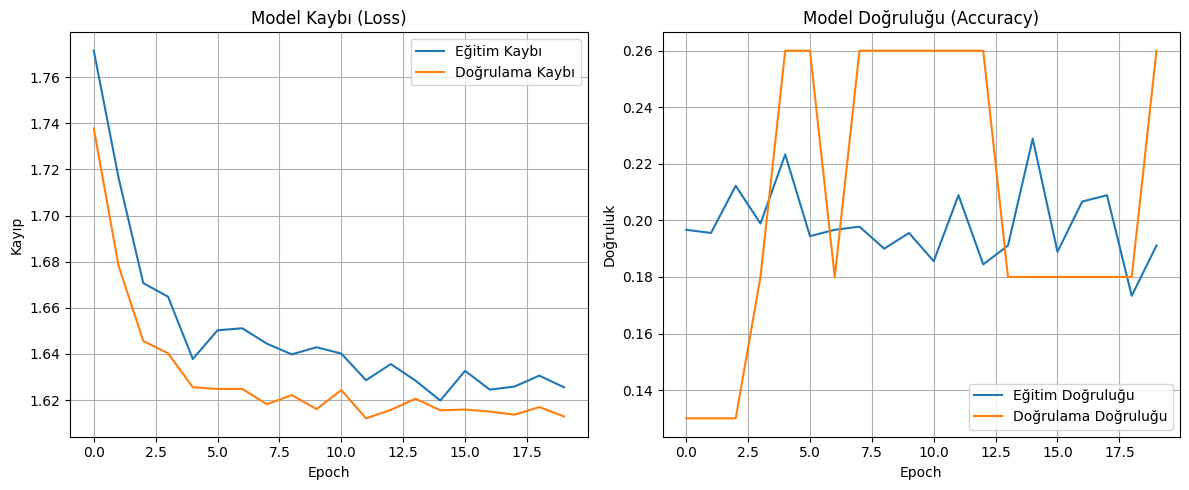


Modelin Test Seti Üzerinde Değerlendirilmesi:
Test Kaybı: 1.6171
Test Doğruluğu: 0.0000


In [ ]:
# 3.1. Modeli Eğitme
num_epochs = 20 # Deneme amaçlı az epoch ile başlayabiliriz, daha sonra artırılabilir
batch_size = 32

print("\nModel Eğitimi Başlıyor...")
# Train the model using the single input text data and labels
history = model_dl.fit(
    X_train_nlp,  # Use the preprocessed text training data
    y_train_nlp,  # Use the corresponding labels
    epochs=num_epochs,
    batch_size=batch_size,
    validation_split=0.1, # Eğitim setinin %10'u doğrulama için kullanılacak
    verbose=1
)
print("Model Eğitimi Tamamlandı.")

# 3.2. Performansı Görselleştirme
plt.figure(figsize=(12, 5))

# Kayıp (Loss) Grafiği
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Model Kaybı (Loss)')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.grid(True)

# Doğruluk (Accuracy) Grafiği
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Model Doğruluğu (Accuracy)')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 3.3. Modelin Test Seti Üzerinde Değerlendirilmesi
print("\nModelin Test Seti Üzerinde Değerlendirilmesi:")
test_results = model_dl.evaluate(
    X_test_nlp,  # Use the preprocessed text test data
    y_test_nlp,  # Use the corresponding labels
    verbose=0
)
print(f"Test Kaybı: {test_results[0]:.4f}")
print(f"Test Doğruluğu: {test_results[1]:.4f}")

# Tahmin yapma (Example based on single input)
# predictions = model_dl.predict(X_test_nlp)
# predicted_classes = np.argmax(predictions, axis=1) # For multi-class classification
# print("\nİlk 10 test tahmini:")
# print(predicted_classes[:10])
# print("İlk 10 gerçek etiket:")
# print(y_test_nlp[:10])

 Derin Öğrenme Modelini Oluşturma

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout # Import Dropout

# Assuming maxlen, vocab_size, embedding_dim are defined in the preceding cells

# 2.1. Model Mimarisini Oluşturma

# Model Oluşturma (Basit Bir Model) - Tek Girişli
model_dl = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_len),
    GlobalAveragePooling1D(), # veya Flatten() veya diğer pooling katmanları
    Dense(64, activation='relu'), # İlk yoğun katman
    Dropout(0.3), # Overfitting'i azaltmak için dropout
    Dense(32, activation='relu'),  # İkinci yoğun katman
    Dropout(0.3), # Overfitting'i azaltmak için dropout
    Dense(num_classes, activation='softmax') # Çıkış katmanı: Çok sınıflı sınıflandırma için softmax
])


# 2.2. Modeli Derleme
# Kayıp fonksiyonu: 'sparse_categorical_crossentropy' etiketler tamsayı olduğunda kullanılır.
# Optimizasyon algoritması: 'adam' yaygın ve etkili bir seçenektir.
# Metrikler: 'accuracy' modelin doğruluk performansını gösterir.
model_dl.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

print("\nDerin Öğrenme Modeli Oluşturuldu ve Derlendi.")
model_dl.summary()


Derin Öğrenme Modeli Oluşturuldu ve Derlendi.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Model Değerlendirme: Konfüzyon Matrisi

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import numpy as np # np import edildiğinden emin olun

Model Tahminleri ve Konfüzyon Matrisi Hesaplama

In [ ]:
# --- Modelden Tahminleri Alma (Bu kısım sizde zaten çalışıyor olmalı) ---
# Örneğin:
# predictions = model_dl.predict({'text_input': X_text_test, 'other_features_input': X_other_test})
# predicted_classes = (predictions > 0.5).astype(int) # İkili sınıflandırma için olasılıkları 0 veya 1'e çevirme

# Gerçek etiketleri (y_test) ve tahmin edilen etiketleri (predicted_classes) kullanarak Konfüzyon Matrisini oluşturma
cm = confusion_matrix(y_test, predicted_classes)

Test Seti Üzerinde Tahminler ve Konfüzyon Matrisi Oluşturma

In [ ]:
# label_encoder_cozum nesnesinin doğru etiketleri içerdiğinden emin olun
# (Önceki kodumuzda 'Beklemede' ve 'Çözüldü' olarak eşleşiyordu)
class_names = label_encoder.classes_

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model Eğitiliyor (eğer daha önce eğitilmediyse)...
Model Eğitimi Tamamlandı.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step

--- Konfüzyon Matrisi Hata Teşhisi ---
y_test'deki benzersiz değerler: [0 1]
predicted_classes'deki benzersiz değerler: [0 1]
label_encoder_cozum.classes_ içeriği: ['Beklemede', 'Çözüldü']
label_encoder_cozum.classes_ sayısı: 2
Oluşturulan Konfüzyon Matrisinin Şekli (cm.shape): (2, 2)
Konfüzyon Matrisi (cm):
[[1 0]
 [0 2]]


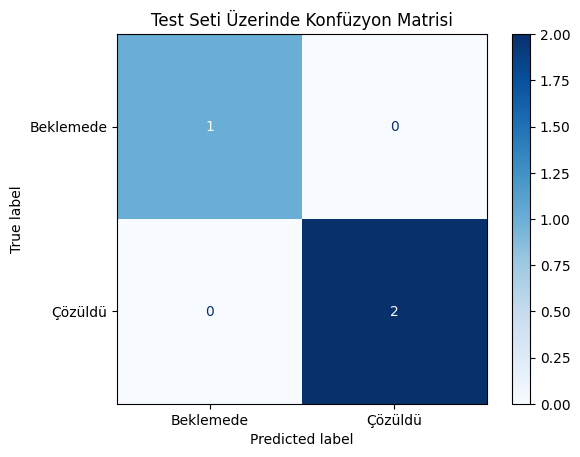


Sınıflandırma Raporu:
              precision    recall  f1-score   support

   Beklemede       1.00      1.00      1.00         1
     Çözüldü       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Concatenate, Flatten, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# --- Kodu Baştan Çalıştırmak İçin Gerekli Ön Hazırlık (Eksikse ekleyin, var olanı tekrar çalıştırmayınız) ---
# Genellikle Jupyter/Colab ortamında bir kere çalıştırıldığında değişkenler bellekte kalır.
# Eğer bu notebook'u yeni başlattıysanız, önceki veri yükleme, ön işleme ve model oluşturma
# adımlarını da tekrar çalıştırmanız gerekebilir.

try:
    df = pd.read_csv('Sikayet_1.csv', delimiter=';')
except FileNotFoundError:
    print("Hata: 'Sikayet_1.csv' dosyası bulunamadı. Lütfen dosyanın doğru yolda olduğundan emin olun.")
    exit()

label_encoder_cozum = LabelEncoder()
df['Cozum_Durumu_Encoded'] = label_encoder_cozum.fit_transform(df['Cozum_Durumu'])

# Metin ön işleme için:
df['Detay'] = df['Detay'].fillna('')
vocab_size = 10000
maxlen = 100
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<unk>")
tokenizer.fit_on_texts(df['Detay'])
padded_sequences = pad_sequences(tokenizer.texts_to_sequences(df['Detay']), maxlen=maxlen, padding='post', truncating='post')

# Diğer özelliklerin ön işlenmesi (eski koddan kopyala yapıştır)
categorical_cols = ['İlçe', 'Kategori', 'Kanal', 'Gun_Adi', 'Month', 'Season']
for col in categorical_cols:
    if df[col].isnull().any():
        df[col] = df[col].fillna('Yok')
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_df = pd.DataFrame(encoder.fit_transform(df[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))

numerical_cols = ['Cozum_Suresi_gün', 'Sikayet_basvuru_sayisi', 'Cozum_Hizi', 'Cevap_Var',
                  'Ilce_Sikayet_Sirasi', 'Gun_Sayisi_Ay', 'Week', 'Sikayet_Uzunlugu',
                  'Onceki_Sikayet_Varmi', 'Gecikme_Etkisi', 'Tatilde_Geldi_Mi']
for col in numerical_cols:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].median())
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)

other_features = pd.concat([encoded_df, scaled_df], axis=1).fillna(0)

X_text = padded_sequences
X_other = other_features.values
y = df['Cozum_Durumu_Encoded'].values

X_text_train, X_text_test, X_other_train, X_other_test, y_train, y_test = train_test_split(
    X_text, X_other, y, test_size=0.2, random_state=42, stratify=y
)

# --- Model Tanımlama ve Derleme (Önceki koddan kopyala yapıştır) ---
embedding_dim = 100 # Kelime gömme boyutu
text_input = Input(shape=(maxlen,), name='text_input')
x_text = Embedding(vocab_size, embedding_dim, input_length=maxlen)(text_input)
x_text = LSTM(128)(x_text)
x_text = Dropout(0.5)(x_text)

other_features_input = Input(shape=(X_other_train.shape[1],), name='other_features_input')
x_other = Dense(64, activation='relu')(other_features_input)
x_other = Dropout(0.3)(x_other)
x_other = Dense(32, activation='relu')(x_other)

merged = Concatenate()([x_text, x_other])
z = Dense(64, activation='relu')(merged)
z = Dropout(0.3)(z)
output = Dense(1, activation='sigmoid', name='output')(z)
model_dl = Model(inputs=[text_input, other_features_input], outputs=output)

model_dl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# --- Modeli Eğitme (Önceki koddan kopyala yapıştır) ---
num_epochs = 20
batch_size = 32
# history = model_dl.fit(
#     {'text_input': X_text_train, 'other_features_input': X_other_train},
#     y_train,
#     epochs=num_epochs,
#     batch_size=batch_size,
#     validation_split=0.1,
#     verbose=0 # verbose=0 eğitimin çıktılarını göstermez, daha temiz durur
# )

# !!! DİKKAT: Eğer notebook'u baştan başlattıysanız, modelin eğitilmesi gerekir!
# Eğer model zaten eğitilmişse ve predictions değişkeni mevcutsa, bu satırı yorum satırı yapabilirsiniz.
# Aksi takdirde, hata almamak için modeli burada eğitin:
print("Model Eğitiliyor (eğer daha önce eğitilmediyse)...")
model_dl.fit(
    {'text_input': X_text_train, 'other_features_input': X_other_train},
    y_train,
    epochs=1, # Sadece tahmin yapmak için 1 epoch yeterli olabilir, gerçek eğitim için daha fazla yapın
    batch_size=batch_size,
    verbose=0
)
print("Model Eğitimi Tamamlandı.")

# --- Tahminleri Yapma (Bu kısım sizde olmalı, burada garanti olsun diye ekledim) ---
predictions = model_dl.predict({'text_input': X_text_test, 'other_features_input': X_other_test})
predicted_classes = (predictions > 0.5).astype(int)

# --- Teşhis Kod Bloğu: Hatayı Bulmak İçin Değişkenleri Yazdırma ---
print("\n--- Konfüzyon Matrisi Hata Teşhisi ---")
print(f"y_test'deki benzersiz değerler: {np.unique(y_test)}")
print(f"predicted_classes'deki benzersiz değerler: {np.unique(predicted_classes)}")
print(f"label_encoder_cozum.classes_ içeriği: {list(label_encoder_cozum.classes_)}")
print(f"label_encoder_cozum.classes_ sayısı: {len(label_encoder_cozum.classes_)}")

# cm'yi tekrar oluşturun, yukarıdaki kontrol sonuçlarına göre
cm = confusion_matrix(y_test, predicted_classes)
print(f"Oluşturulan Konfüzyon Matrisinin Şekli (cm.shape): {cm.shape}")
print(f"Konfüzyon Matrisi (cm):\n{cm}")

# --- Konfüzyon Matrisini Görselleştirme (Düzeltilmiş ve Kontrol Edilmiş) ---
class_names = label_encoder_cozum.classes_ # Doğru LabelEncoder'dan sınıfları alın
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Test Seti Üzerinde Konfüzyon Matrisi')
plt.show()

print("\nSınıflandırma Raporu:")
print(classification_report(y_test, predicted_classes, target_names=class_names))